In [1]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import metrics
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import (
    Ridge,RidgeCV,
    Lasso,LassoCV,
    ElasticNet, ElasticNetCV,
    LinearRegression
)
from sklearn.model_selection import(
    cross_val_score,
    train_test_split
)
from sklearn.preprocessing import (
    StandardScaler,
    PolynomialFeatures
)
from sklearn.feature_selection import SelectFromModel
# pd.set_option('display.max_rows', 1000)  # or 1000
# pd.set_option('display.max_columns', 1000)  # or 1000

from itertools import combinations
from itertools import permutations

from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_csv('datasets/train.csv')
kaggle_test = pd.read_csv('datasets/test.csv')

In [3]:
df.shape

(2051, 81)

In [4]:
kaggle_test.shape

(878, 80)

In [5]:
# rename column names 

new_columns = {
    'Id': 'id',
    'PID':'pid',
    'MS SubClass': 'ms_subclass',
    'MS Zoning': 'ms_zoning',
    'Lot Frontage': 'lot_front',
    'Lot Area': 'lot_area',
    'Street': 'street',
    'Alley':'alley',
    'Lot Shape': 'lot_shape',
    'Land Contour':'land_contour',
    'Utilities': 'util',
    'Lot Config': 'lot_config',
    'Land Slope': 'land_slope',
    'Neighborhood': 'neighborhood',
    'Condition 1': 'cond_1',    
    'Condition 2': 'cond_2',
    'Bldg Type': 'bldg_type',
    'House Style': 'house_style',
    'Overall Qual': 'overall_qual',
    'Overall Cond': 'overall_cond',
    'Year Built': 'year_built',
    'Year Remod/Add': 'year_remod_add',
    'Roof Style': 'roof_style',
    'Roof Matl': 'roof_matl',
    'Exterior 1st': 'ext_1st',
    'Exterior 2nd': 'ext_2nd',
    'Mas Vnr Type': 'mas_vnr_type',
    'Mas Vnr Area': 'mas_vnr_area',
    'Exter Qual': 'exter_qual',
    'Exter Cond': 'exter_cond',
    'Foundation': 'foundation',
    'Bsmt Qual': 'bsmt_qual',
    'Bsmt Cond': 'bsmt_cond',
    'Bsmt Exposure': 'bsmt_exposure',
    'BsmtFin Type 1': 'bsmtfin_type1',
    'BsmtFin SF 1': 'bsmtfin_sf1',
    'BsmtFin Type 2': 'bsmt_type2',
    'BsmtFin SF 2': 'bsmt_sf2',
    'Bsmt Unf SF': 'bsmt_unf_sf',
    'Total Bsmt SF': 'total_bsmt_sf',
    'Heating': 'heating',
    'Heating QC': 'heating_qc',
    'Central Air': 'central_air',
    'Electrical': 'electrical',
    '1st Flr SF': '1st_flr_sf',
    '2nd Flr SF': '2nd_flr_sf',
    'Low Qual Fin SF': 'low_qual_fin_sf',
    'Gr Liv Area': 'gr_liv_area',
    'Bsmt Full Bath': 'bsmt_full_bath',    
    'Bsmt Half Bath': 'bsmt_half_bath',
    'Full Bath': 'full_bath',
    'Half Bath': 'half_bath',
    'Bedroom AbvGr': 'bedroom_abv_gr',
    'Kitchen AbvGr': 'kitchen_abv_gr',
    'Kitchen Qual': 'kitchen_qual',
    'TotRms AbvGrd': 'tot_rms_abv_grd',
    'Functional': 'functional',
    'Fireplaces': 'fireplace',
    'Fireplace Qu': 'fireplace_qu',
    'Garage Type': 'garage_type',
    'Garage Yr Blt': 'garage_yr_blt',
    'Garage Finish': 'garage_finish',
    'Garage Cars': 'garag_cars',
    'Garage Area': 'garage_area',
    'Garage Qual': 'garage_qual',
    'Garage Cond': 'garage_cond',
    'Paved Drive': 'paved_drive',
    'Wood Deck SF': 'wood_deck_sf',
    'Open Porch SF': 'open_porch_sf',
    'Enclosed Porch': 'enclosed_porch',
    '3Ssn Porch': '3ssn_porch',
    'Screen Porch': 'screen_porch',
    'Pool Area': 'pool_area',
    'Pool QC': 'pool_qc',
    'Fence': 'fence',
    'Misc Feature': 'misc_feature',
    'Misc Val': 'misc_val',
    'Mo Sold': 'mo_sold',
    'Yr Sold': 'yr_sold',
    'Sale Type': 'sale_type',
    'SalePrice':'sale_price',
}

df.rename(columns=new_columns, inplace=True)
kaggle_test.rename(columns=new_columns, inplace=True)

In [6]:
df = pd.concat([df,kaggle_test], axis = 0)

In [7]:
df.shape

(2929, 81)

## EDA
- **Read the data dictionary.**
- Determine _what_ missing values mean.
- Figure out what each categorical value represents.
- Identify outliers.
- Consider whether discrete values are better represented as categorical or continuous. (Are relationships to the target linear?)

## Data Cleaning
- Decide how to impute null values.
- Decide how to handle outliers.
- Do you want to combine any features?
- Do you want to have interaction terms?
- Do you want to manually drop collinear features?

**Clean missing values**  

In [8]:
# build list of features with na 

feature_nan = [feature for feature in df.columns if df[feature].isnull().sum()]
for feat in feature_nan:
    print(feat, f'has {round((df[feat].isnull().mean())*100,2)}% missing values')

lot_front has 16.73% missing values
alley has 93.24% missing values
mas_vnr_type has 0.79% missing values
mas_vnr_area has 0.79% missing values
bsmt_qual has 2.73% missing values
bsmt_cond has 2.73% missing values
bsmt_exposure has 2.83% missing values
bsmtfin_type1 has 2.73% missing values
bsmtfin_sf1 has 0.03% missing values
bsmt_type2 has 2.77% missing values
bsmt_sf2 has 0.03% missing values
bsmt_unf_sf has 0.03% missing values
total_bsmt_sf has 0.03% missing values
electrical has 0.03% missing values
bsmt_full_bath has 0.07% missing values
bsmt_half_bath has 0.07% missing values
fireplace_qu has 48.55% missing values
garage_type has 5.36% missing values
garage_yr_blt has 5.43% missing values
garage_finish has 5.43% missing values
garag_cars has 0.03% missing values
garage_area has 0.03% missing values
garage_qual has 5.43% missing values
garage_cond has 5.43% missing values
pool_qc has 99.56% missing values
fence has 80.47% missing values
misc_feature has 96.38% missing values
sal

**Some missing values are bigger percentage than the other** 

- we need to find the correlation between the missing values and the sales price to judge if its good to remove or to keep

**Approach**

1) Larger values - might remove or place median/mode

2) Smaller values - need to conduct EDA and decide later

In [9]:
df = df.reset_index()

In [10]:
df.head()

,index,id,pid,ms_subclass,ms_zoning,lot_front,lot_area,street,alley,lot_shape,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,sale_price
0,0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500.0
1,1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000.0
2,2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000.0
3,3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000.0
4,4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500.0


69.19967199671997
68.0


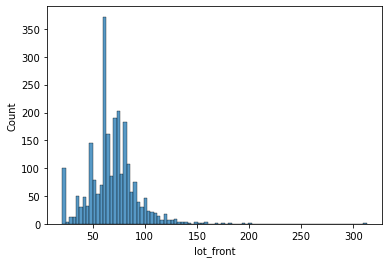

In [11]:
# Lot_font has normal distrubtion centered across mean of 69

sns.histplot(x = 'lot_front', data =df)
print(df['lot_front'].mean())
print(df['lot_front'].median())

In [12]:
# get mean and fill into NA
# why mean -->> because normally distributed centered at mean 69. 
df['lot_front'].fillna(df['lot_front'].mean(),inplace = True)

69.19967199671997


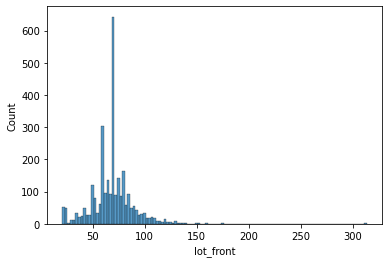

In [13]:
# Lot_font has normal distrubtion centered across mean of 69

sns.histplot(x = 'lot_front', data =df)
print(df['lot_front'].mean())

In [14]:
# change 'nan' to NoAlleyAccess
df['alley'] = df['alley'].map(lambda x: 'NoAlley' if pd.isnull(x) else x)

<AxesSubplot:xlabel='alley', ylabel='sale_price'>

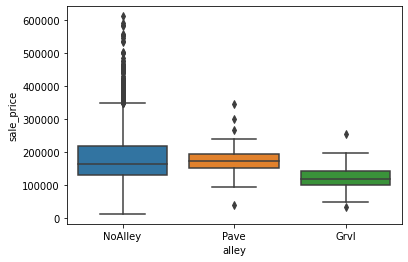

In [15]:
# no meaning to the sales 
# drop alley

sns.boxplot(
    data = df,
    x = 'alley',
    y = 'sale_price'
)

Boxplot shows strong outliers in NoAlley

In [16]:
# mas_vnr_type -->> categorical, insert most common type 
df.groupby(by='mas_vnr_type').count()['id']

mas_vnr_type
BrkCmn       25
BrkFace     880
CBlock        1
None       1752
Stone       248
Name: id, dtype: int64

mas_vnr_type already has a None column. Will need to classify nan into the mode of the types for minimal impact


In [17]:
# fill missing values with mode of mas_vnr_type
df['mas_vnr_type'].fillna(df['mas_vnr_type'].mode()[0], inplace = True)

(0.0, 600.0)

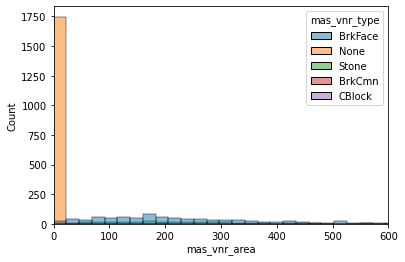

In [18]:
# checked categories for mas_vnr_area
# found if mas vnr area == 0, then belongs to none
sns.histplot(x = 'mas_vnr_area', hue = 'mas_vnr_type', data =df)
plt.xlim(0,600)

<AxesSubplot:xlabel='mas_vnr_type', ylabel='sale_price'>

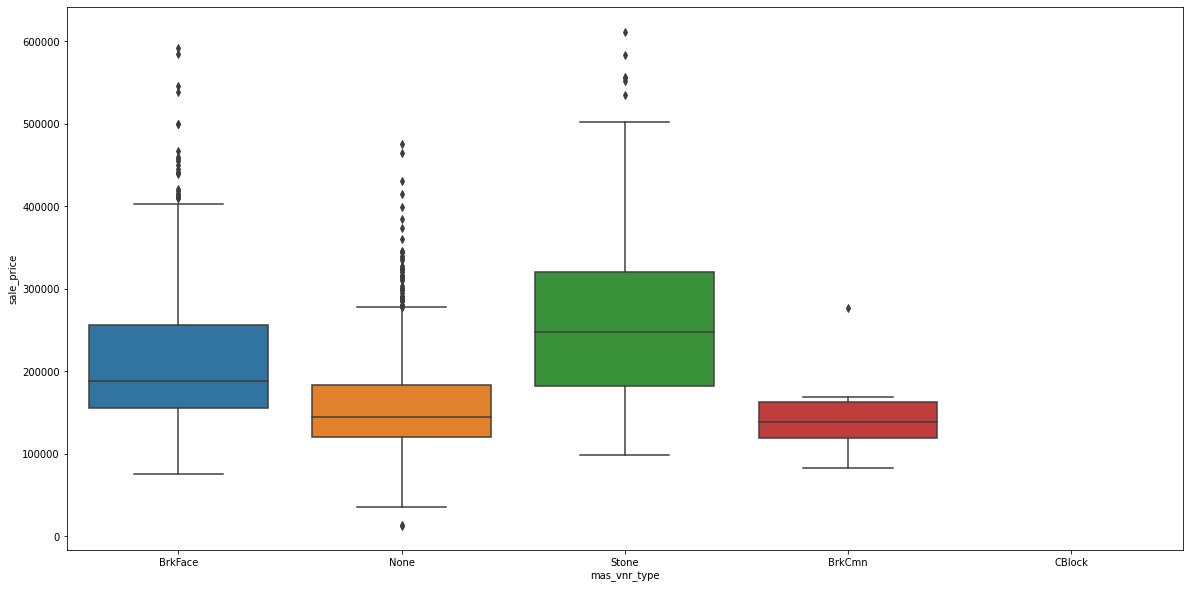

In [19]:
# checking nominal category: mas_vnr_type against sale price

plt.figure(figsize=(20,10))
sns.boxplot(
    x = 'mas_vnr_type',
    y = 'sale_price',
    data = df
)

In [20]:
# create dictionary that stores mean of
mas_dict_mean = {key:val for key, val in df.groupby(['mas_vnr_type'])['mas_vnr_area'].mean().iteritems()}

mas_dict_mean

{'BrkCmn': 195.48,
 'BrkFace': 261.6465909090909,
 'CBlock': 198.0,
 'None': 0.7031963470319634,
 'Stone': 237.44354838709677}

In [21]:
# create function that returns mean based on mas_dict_mean if column has null values 
def enter_area(col):
    area = col[0]
    mas_type = col[1]
    if pd.isnull(area):
        return mas_dict_mean[mas_type]
    else:
        return area

In [22]:
# fill in null values for -->> mas_vnr_area
df['mas_vnr_area'] = df[['mas_vnr_area', 'mas_vnr_type']].apply(enter_area, axis = 1)

In [23]:
# missing values seems common across about bsmt columns 
df[df['bsmt_exposure'].isnull()]

,index,id,pid,ms_subclass,ms_zoning,lot_front,lot_area,street,alley,lot_shape,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,sale_price
12,12,807,906226060,70,RL,120.000000,26400,Pave,NoAlley,Reg,...,0,0,NaN,NaN,NaN,0,6,2009,WD,131000.0
93,93,811,906226100,90,RL,64.000000,7018,Pave,NoAlley,Reg,...,0,0,NaN,GdPrv,NaN,0,6,2009,WD,118858.0
114,114,781,905228050,20,RL,69.199672,9000,Pave,NoAlley,Reg,...,0,0,NaN,NaN,NaN,0,6,2009,WD,63900.0
146,146,888,908128060,85,RL,64.000000,7301,Pave,NoAlley,Reg,...,0,0,NaN,NaN,NaN,0,7,2009,ConLD,198500.0
183,183,1554,910251050,20,A (agr),80.000000,14584,Pave,NoAlley,Reg,...,0,0,NaN,NaN,NaN,0,2,2008,WD,13100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2672,621,808,906226070,90,RL,64.000000,7018,Pave,NoAlley,Reg,...,0,0,NaN,NaN,NaN,0,6,2009,WD,NaN
2676,625,1818,531477040,90,RH,60.000000,8400,Pave,NoAlley,Reg,...,0,0,NaN,NaN,NaN,0,10,2007,WD,NaN
2705,654,1220,534451080,20,RL,69.199672,6627,Pave,NoAlley,IR1,...,0,0,NaN,NaN,NaN,0,7,2008,WD,NaN
2753,702,552,531475220,90,RL,75.000000,8250,Pave,NoAlley,Reg,...,0,0,NaN,NaN,NaN,0,5,2009,WD,NaN


,bsmtfin_sf1,bsmt_sf2,bsmt_unf_sf,total_bsmt_sf,sale_price
sale_price,0.423519,0.016255,0.190210,0.628925,1.000000
total_bsmt_sf,0.533588,0.090784,0.412171,1.000000,0.628925
bsmtfin_sf1,1.000000,-0.053876,-0.480213,0.533588,0.423519
bsmt_unf_sf,-0.480213,-0.238569,1.000000,0.412171,0.190210
bsmt_sf2,-0.053876,1.000000,-0.238569,0.090784,0.016255


<Figure size 1080x1080 with 0 Axes>

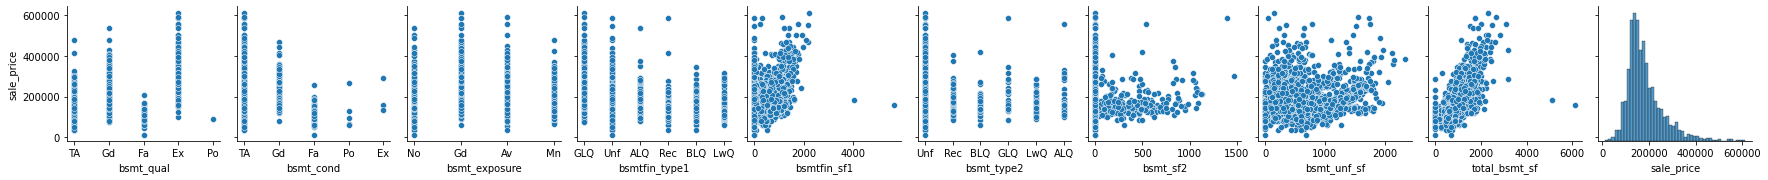

In [24]:
# create pairplot to check relationship between all bsmt parameters against sale_price
# noticed only total_basement_sf and  area has high correlation with sale_price
# checked only 58 out of 2051 data has NAN -->> meaning no basement 
# will want to change all null to 'NoBsmt'

plt.figure(figsize=(15,15))
sub_bsmt = ['bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type1', 'bsmtfin_sf1', 'bsmt_type2', 'bsmt_sf2', 'bsmt_unf_sf',
       'total_bsmt_sf', 'sale_price']

sns.pairplot(
    df,
    x_vars = sub_bsmt,
    y_vars = ['sale_price'],
    
);

# create and sort dataframe based on correlation with basement area vs price 
df[sub_bsmt].corr().sort_values(by = 'sale_price', ascending = False)

In [25]:
# Create none category for those without basement
df['bsmt_cond'].fillna('NoBsmt',inplace = True)

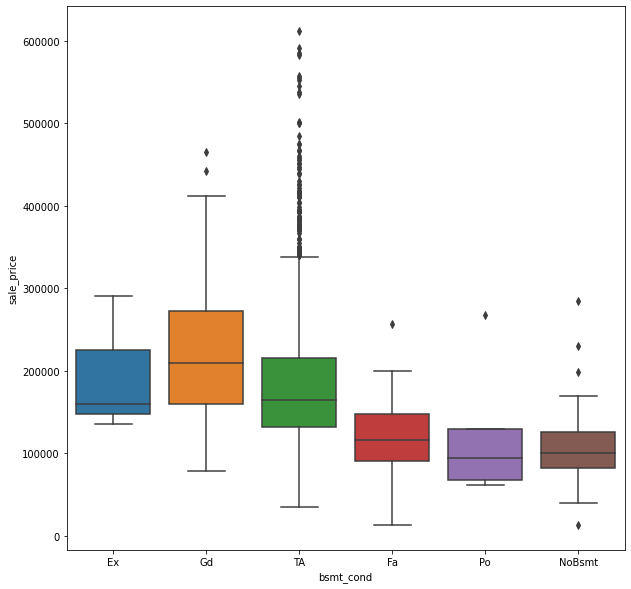

In [26]:
#plot bigger figure size
plt.figure(figsize=(10,10))
# cross check category, makes sense that those without basement will have lowest mean sale price 
sns.boxplot(
    x = 'bsmt_cond',
    y = 'sale_price',
    data = df,
    order = ['Ex','Gd', 'TA', 'Fa', 'Po', 'NoBsmt']
);

In [27]:
# Create none category for those without basement
df['bsmt_type2'].fillna('NoBsmt',inplace = True)

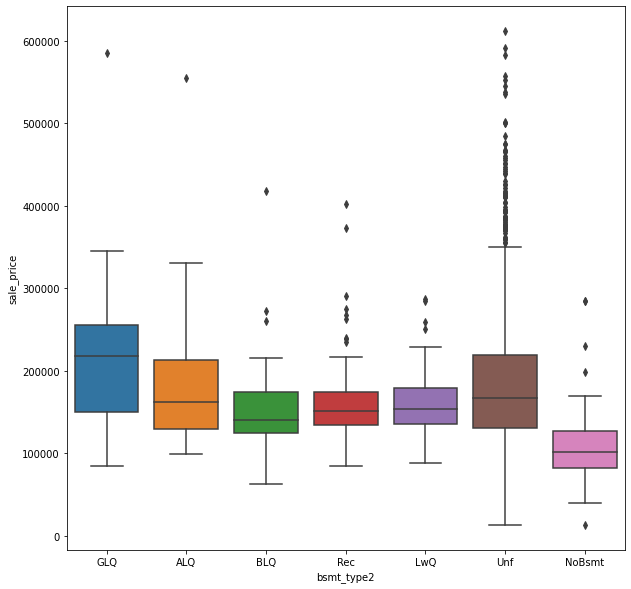

In [28]:
#plot bigger figure size
plt.figure(figsize=(10,10))
# notice higher prices are under unfinised. 
# no basement is the lowest mean score, which fits the ordinal flow. 

sns.boxplot(
    x = 'bsmt_type2',
    y = 'sale_price',
    data = df,
    order = ['GLQ', 'ALQ','BLQ','Rec','LwQ','Unf','NoBsmt']
);

In [29]:
# since it is numerical cat, need to take a look at mean. 
# found those with null, average sale price is lower than all the other cats 
# hence safe to create another cat for None. 

bsmt_mean_null = df.loc[df['bsmt_exposure'].isnull(), 'sale_price'].mean()
bsmt_mean = df.groupby('bsmt_exposure').mean()['sale_price']
print(f'mean of null values: {bsmt_mean_null}')
print('\n')
print(f'Mean values of basement exposure: {bsmt_mean}')
df['bsmt_exposure'].value_counts()

mean of null values: 111635.91379310345


Mean values of basement exposure: bsmt_exposure
Av    206262.451389
Gd    271610.566502
Mn    189377.570552
No    164533.532487
Name: sale_price, dtype: float64


No    1906
Av     418
Gd     283
Mn     239
Name: bsmt_exposure, dtype: int64

In [30]:
# Create none category for those without basement
df['bsmt_exposure'].fillna('NoBsmt',inplace = True)

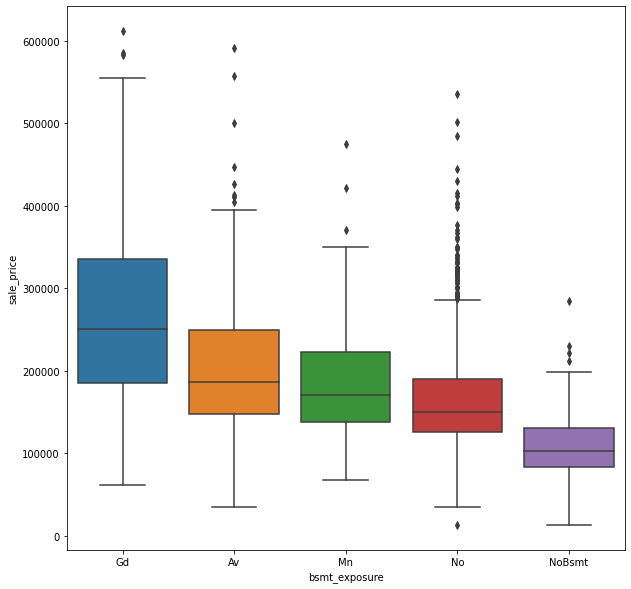

In [31]:
#plot bigger figure size
plt.figure(figsize=(10,10))
# cross checked ordinally correct for No basement cat
sns.boxplot(
    x = 'bsmt_exposure',
    y = 'sale_price',
    data = df,
    order = ['Gd','Av','Mn','No','NoBsmt']
);

In [32]:
# fill up null values with NoBsmt
df['bsmt_qual'].fillna('NoBsmt', inplace = True)

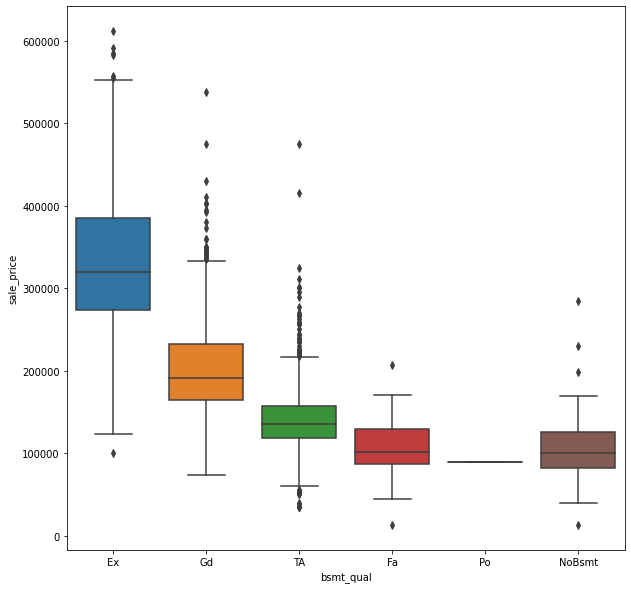

In [33]:
#plot bigger figure size
plt.figure(figsize=(10,10))
# cross checked ordinally correct for No basement cat
sns.boxplot(
    x = 'bsmt_qual',
    y = 'sale_price',
    data = df,
    order = ['Ex','Gd', 'TA', 'Fa', 'Po', 'NoBsmt']
);



**Seeing small points for Po** 
- might need to remove it if want to use this variable as it might skew predicted data inaccurately during feature engineering

In [34]:
# fill up null values with NoBsmt
df['bsmtfin_type1'].fillna('NoBsmt', inplace = True) 

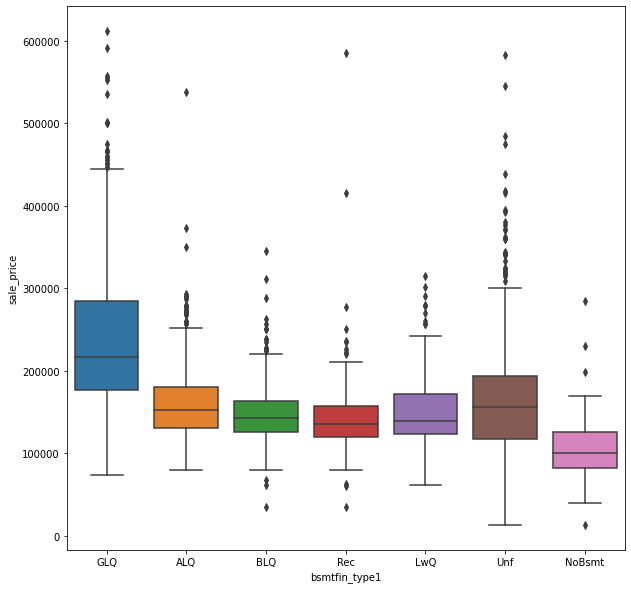

In [35]:
#plot bigger figure size
plt.figure(figsize=(10,10))

# cross checked ordinally correct for No basement cat
sns.boxplot(
    x = 'bsmtfin_type1',
    y = 'sale_price',
    data = df,
    order = ['GLQ', 'ALQ','BLQ','Rec','LwQ','Unf','NoBsmt']
);

In [36]:
# checked row has no basement
df[df['total_bsmt_sf'].isnull()]

,index,id,pid,ms_subclass,ms_zoning,lot_front,lot_area,street,alley,lot_shape,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,sale_price
1327,1327,1342,903230120,20,RM,99.0,5940,Pave,NoAlley,IR1,...,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,79000.0


In [37]:
# replace na with 0 feet square

df['bsmtfin_sf1'].fillna(0, inplace = True) 
df['bsmt_sf2'].fillna(0, inplace = True) 
df['total_bsmt_sf'].fillna(0, inplace = True) 
df['bsmt_unf_sf'].fillna(0, inplace = True) 

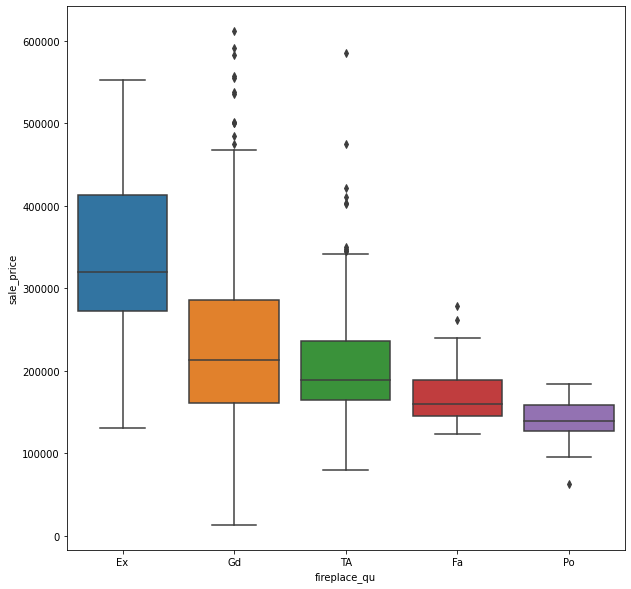

In [38]:
# Establish size of figure.
plt.figure(figsize = (10,10))
# ordinal relationship is strong against price 
sns.boxplot(
    x = 'fireplace_qu',
    y = 'sale_price',
    data = df,
    order = ['Ex', 'Gd', 'TA', 'Fa', 'Po'],
);

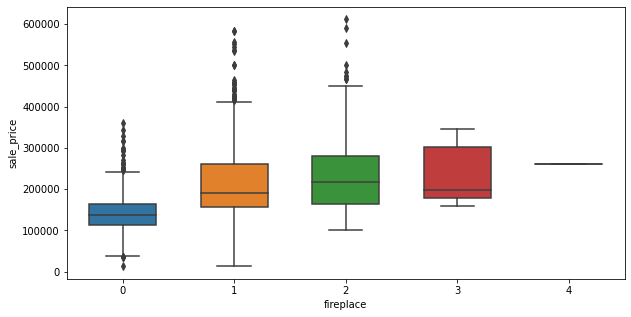

In [39]:
# Establish size of figure.
plt.figure(figsize = (10,5))
# creaste boxplot for fireplace 
sns.boxplot(
    x = 'fireplace',
    y = 'sale_price',
    data = df,
    width = 0.6
);

In [40]:
df.groupby('fireplace')['fireplace'].count()

fireplace
0    1422
1    1273
2     221
3      12
4       1
Name: fireplace, dtype: int64

**Comment**
- Observed rating 4 having only one point, might need to remove this variable if need to use as results might be skewed

In [41]:
# null values contain sale price mean close to 144000
df[df['fireplace_qu'].isnull()].agg(['mean', 'median'])['sale_price']

C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


mean      142001.103
median    136500.000
Name: sale_price, dtype: float64

In [42]:
# found that cat Po suites best for null values to be included without affecting much mean 
df.groupby(['fireplace_qu']).agg(['mean', 'median', 'count'])['sale_price']

,mean,median,count
fireplace_qu,,,
Ex,331481.483871,320000.0,31
Fa,170287.203390,159500.0,59
Gd,233578.388145,213490.0,523
Po,139263.967742,139000.0,31
TA,204893.621622,188500.0,407


In [43]:
# fill na with NoFireplace
df['fireplace_qu'] = df['fireplace_qu'].fillna('NoFireplace')

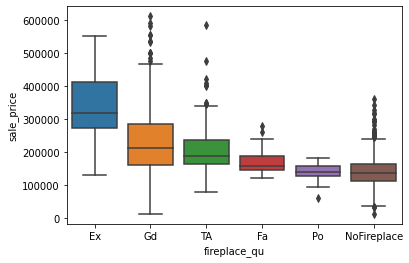

In [44]:
# cross checked ordinally correct for nofireplace
sns.boxplot(
    x = 'fireplace_qu',
    y = 'sale_price',
    data = df,
    order = ['Ex', 'Gd', 'TA', 'Fa', 'Po','NoFireplace'],
);

**Comment**
- Can see alot of outliers in Gd, TA, and Po (after adding NAN) inside. Correlation or ordinal relationship is strong against sale price

,garage_yr_blt,garag_cars,garage_area,sale_price
sale_price,0.533922,0.648220,0.650270,1.000000
garage_area,0.554731,0.889572,1.000000,0.650270
garag_cars,0.586477,1.000000,0.889572,0.648220
garage_yr_blt,1.000000,0.586477,0.554731,0.533922


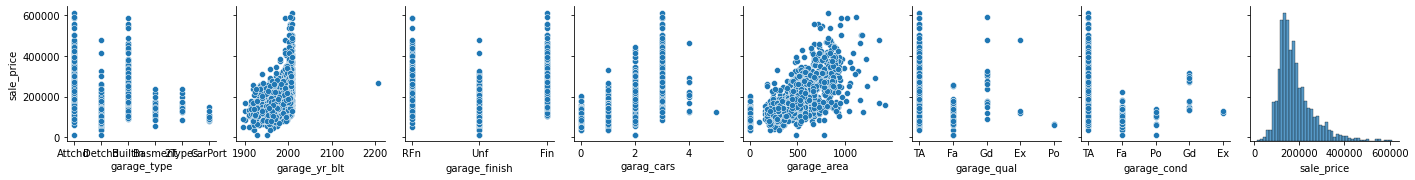

In [45]:
# creating pairplot garage variables against sale price
sns.pairplot(
    y_vars = 'sale_price',
    x_vars = ['garage_type',
    'garage_yr_blt', 'garage_finish', 'garag_cars', 'garage_area',
    'garage_qual', 'garage_cond','sale_price'],
    data = df
)

# create and sort dataframe based on correlation with garage vs price 
# most numerical categories are quite correlated with sale price 

df[['garage_type',
    'garage_yr_blt', 'garage_finish', 'garag_cars', 'garage_area',
    'garage_qual', 'garage_cond','sale_price']].corr().sort_values(by = 'sale_price', ascending = False)

In [46]:
# fill in None for now, might drop categorical columns if need to refine model

df['garage_type'] = df['garage_type'].fillna('NoGarage')
df['garage_finish'] = df['garage_finish'].fillna('NoGarage')
df['garage_qual'] = df['garage_qual'].fillna('NoGarage')
df['garage_cond'] = df['garage_cond'].fillna('NoGarage')

df['garage_area'].fillna(df['garage_area'].mean(),inplace = True)
df['garag_cars'].fillna(df['garag_cars'].mode()[0],inplace = True)
# drop garage year built as null values cannot be replaced, it cannot be replaced by any random values or mean too. 

df.drop(columns = ['garage_yr_blt'], inplace = True)

In [47]:
# noticed when pool area ==0, other categories also null 

df[df['pool_area'] == 0]

,index,id,pid,ms_subclass,ms_zoning,lot_front,lot_area,street,alley,lot_shape,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,sale_price
0,0,109,533352170,60,RL,69.199672,13517,Pave,NoAlley,IR1,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500.0
1,1,544,531379050,60,RL,43.000000,11492,Pave,NoAlley,IR1,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000.0
2,2,153,535304180,20,RL,68.000000,7922,Pave,NoAlley,Reg,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000.0
3,3,318,916386060,60,RL,73.000000,9802,Pave,NoAlley,Reg,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000.0
4,4,255,906425045,50,RL,82.000000,14235,Pave,NoAlley,IR1,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2924,873,1662,527377110,60,RL,80.000000,8000,Pave,NoAlley,Reg,...,0,0,NaN,NaN,NaN,0,11,2007,WD,NaN
2925,874,1234,535126140,60,RL,90.000000,14670,Pave,NoAlley,Reg,...,0,0,NaN,MnPrv,NaN,0,8,2008,WD,NaN
2926,875,1373,904100040,20,RL,55.000000,8250,Pave,NoAlley,Reg,...,0,0,NaN,NaN,NaN,0,8,2008,WD,NaN
2927,876,1672,527425140,20,RL,60.000000,9000,Pave,NoAlley,Reg,...,0,0,NaN,GdWo,NaN,0,5,2007,WD,NaN


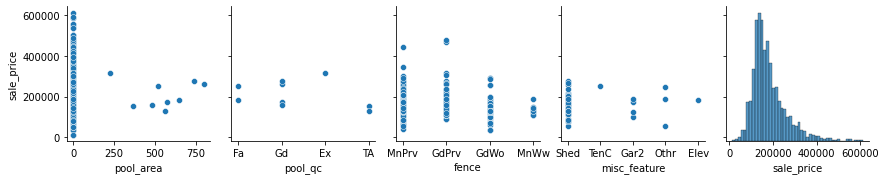

In [48]:
# too little points to do correlation for pool area 

sns.pairplot(
    x_vars = ['pool_area', 'pool_qc', 'fence', 'misc_feature', 'sale_price'],
    y_vars = 'sale_price',
    data = df
)

In [49]:
# drop all pool columns 

drop_pool_list = ['pool_qc', 'fence', 'misc_feature']

df = df.drop(columns = drop_pool_list, axis = 1)

<AxesSubplot:xlabel='year_built', ylabel='sale_price'>

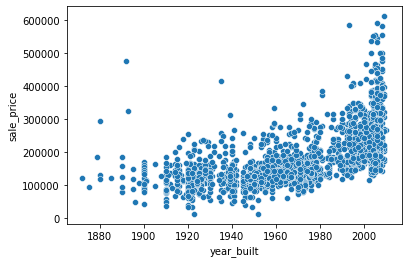

In [50]:
# seeing decreasing trend, and exceptionally high cost built recently 
sns.scatterplot(
    x = 'year_built',
    y = 'sale_price',
    data = df
)

<AxesSubplot:xlabel='sale_price', ylabel='Count'>

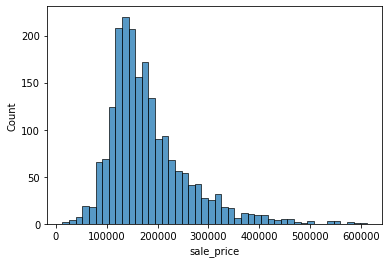

In [51]:
sns.histplot(x = 'sale_price', data = df)

In [52]:
# creating another set of classifiers for sale price for analysis
# need to remove during fitting 
df['sale_price_classified'] = df['sale_price'].apply(lambda x: 2 if x > 450000 else 1 if ((x < 450000) & (x > 300000)) else 0)

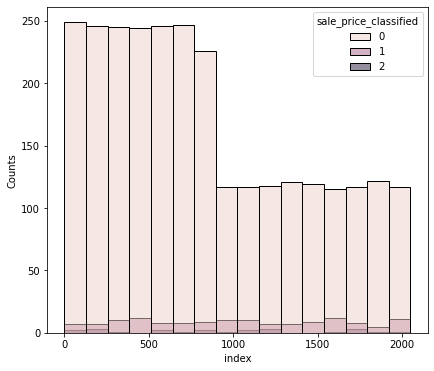

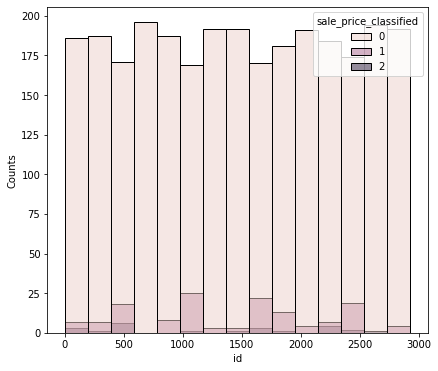

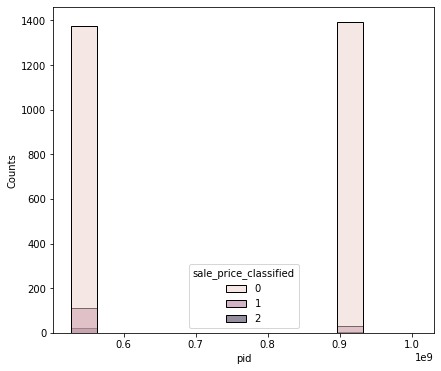

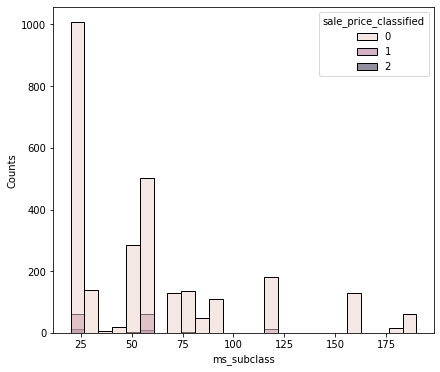

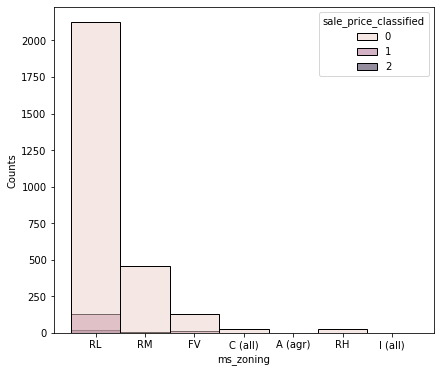

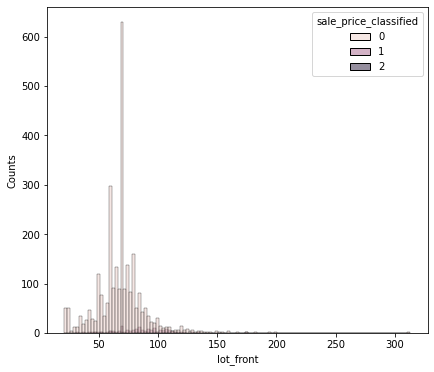

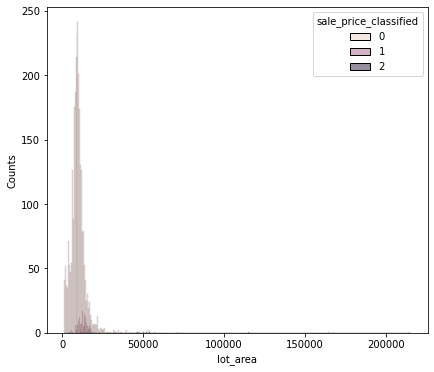

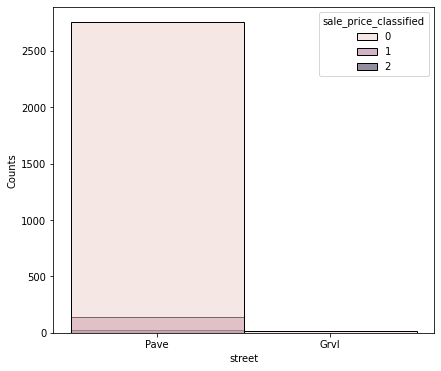

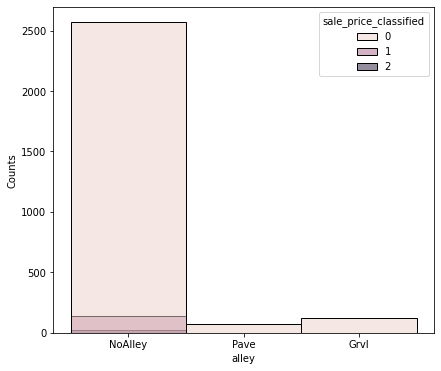

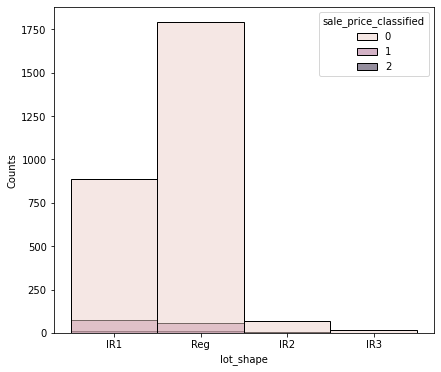

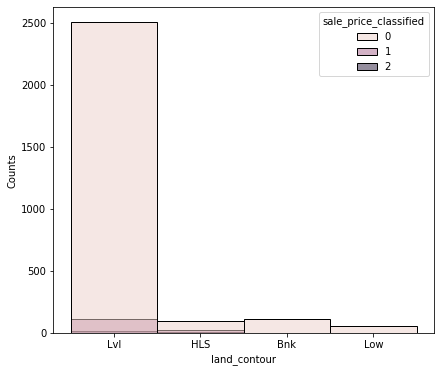

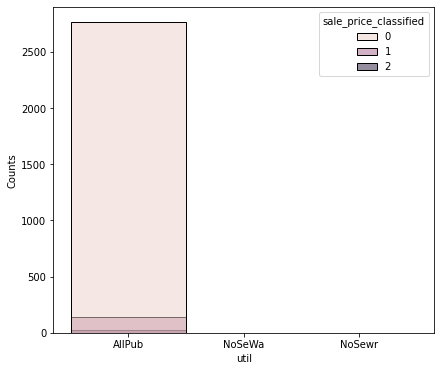

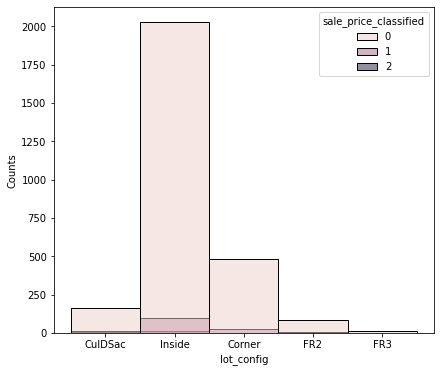

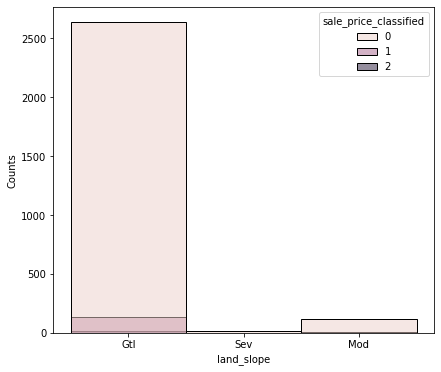

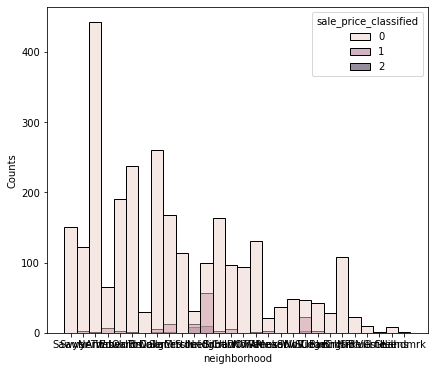

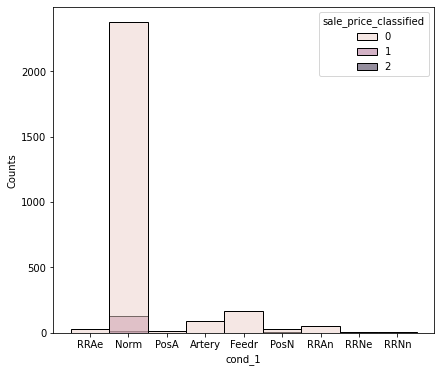

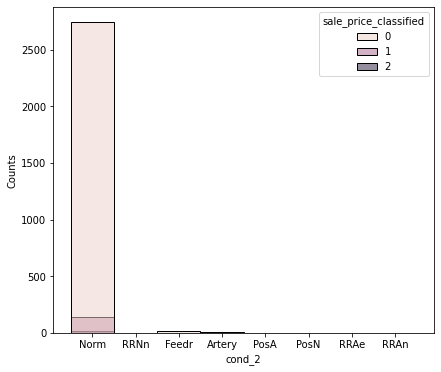

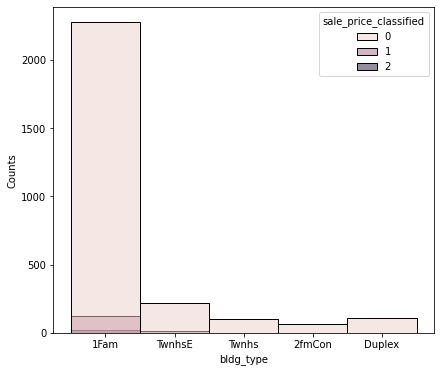

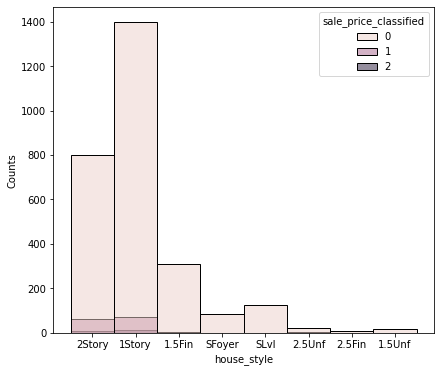

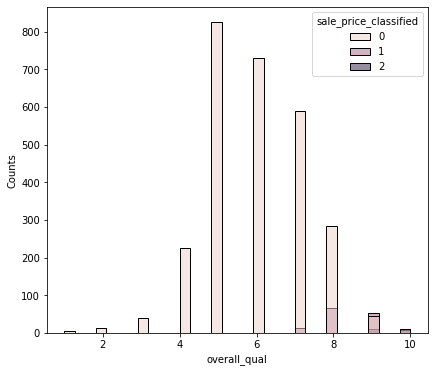

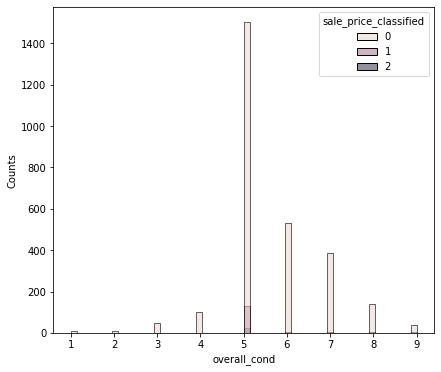

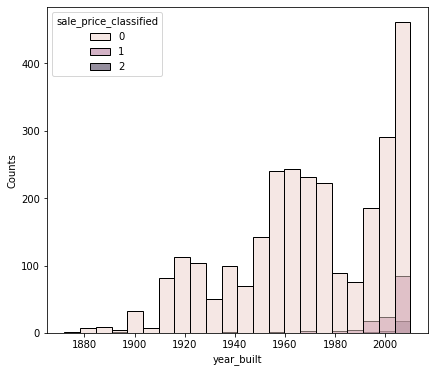

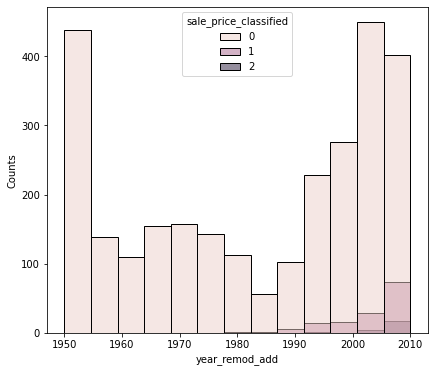

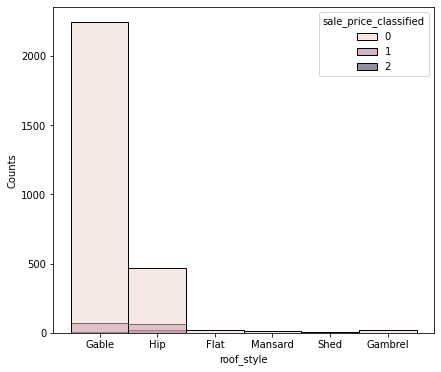

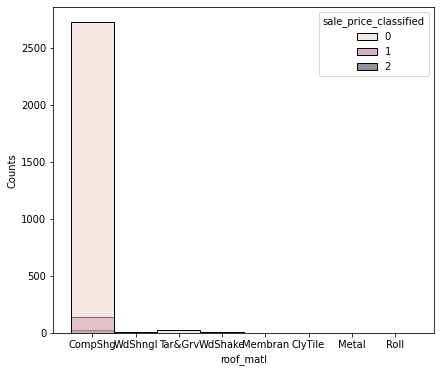

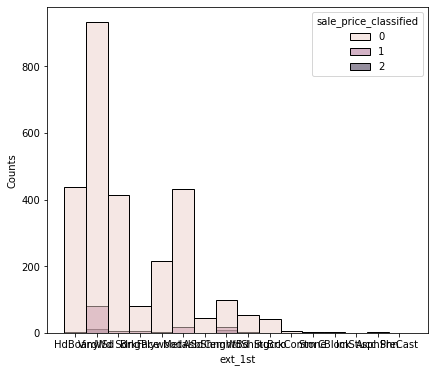

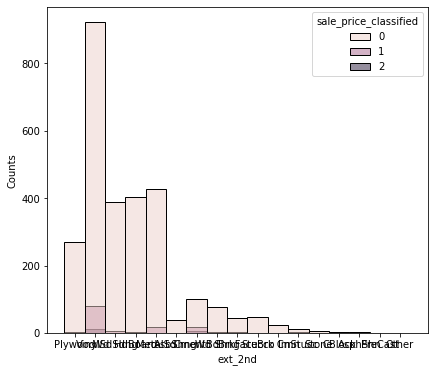

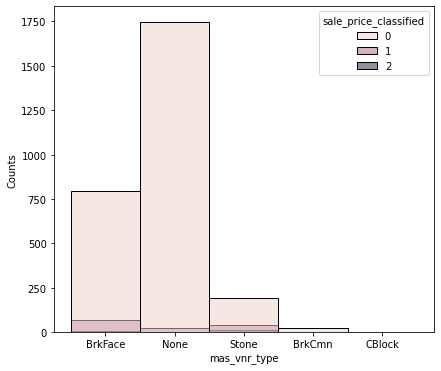

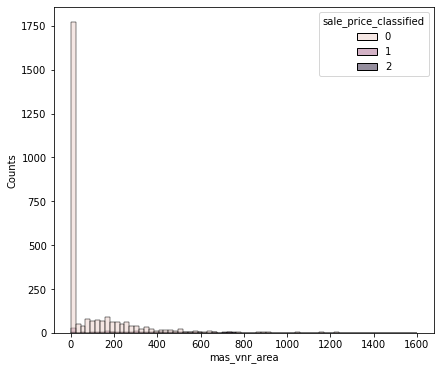

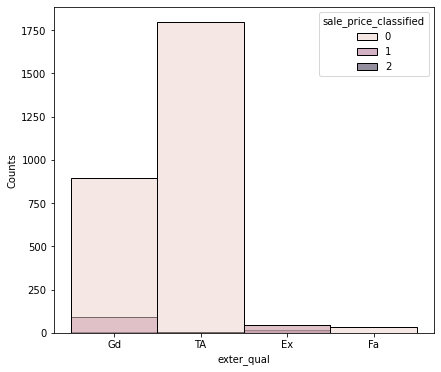

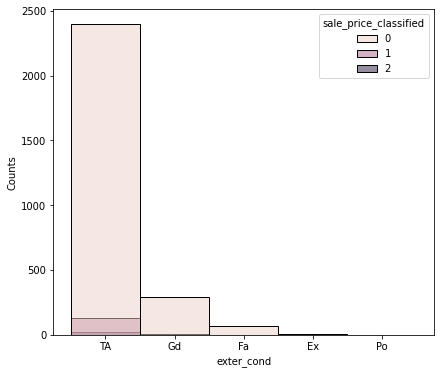

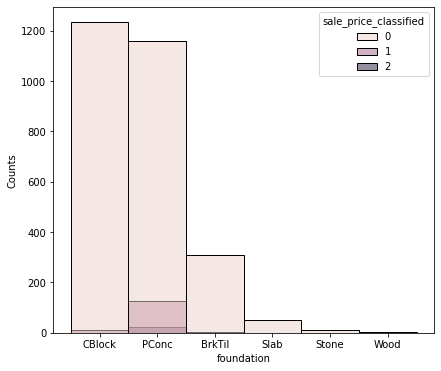

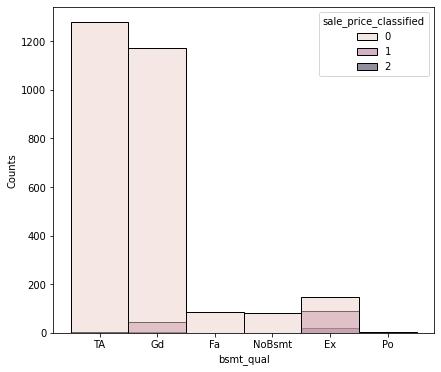

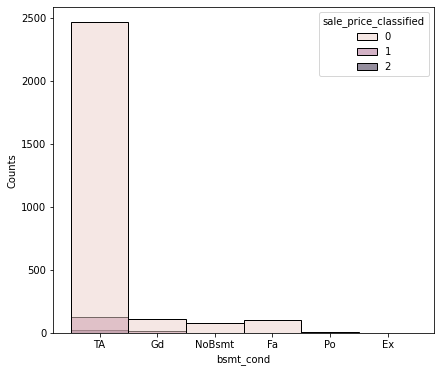

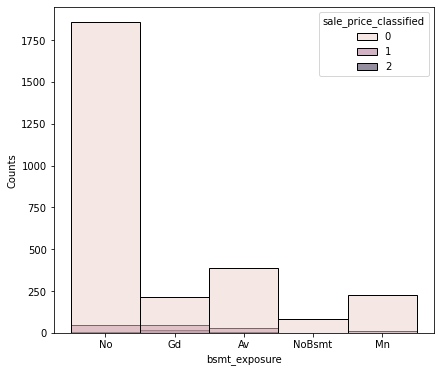

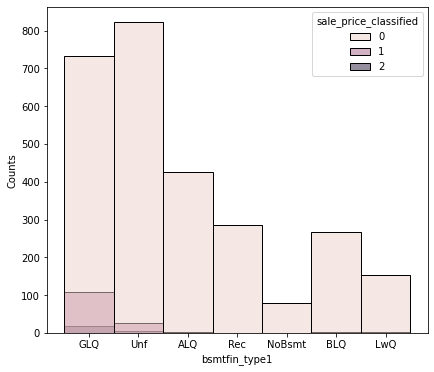

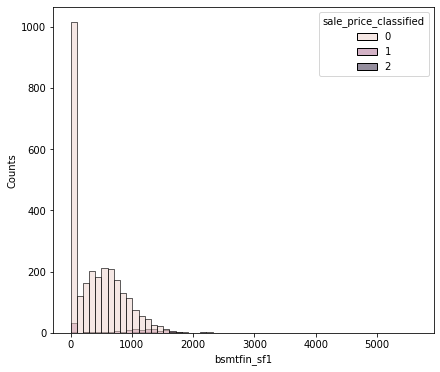

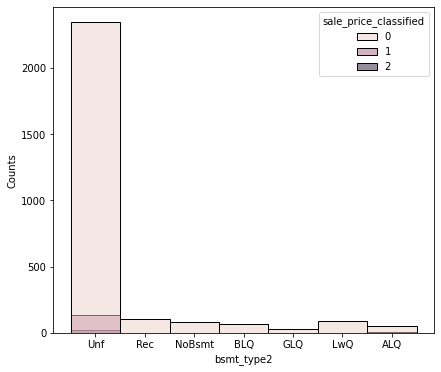

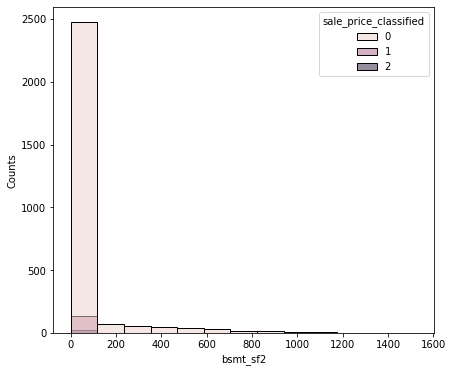

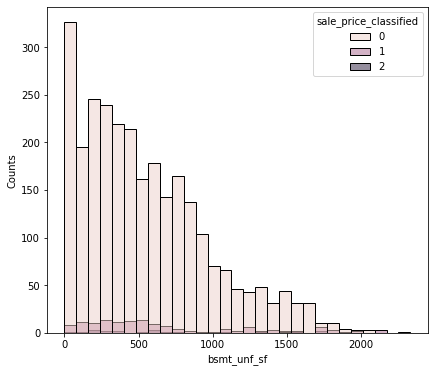

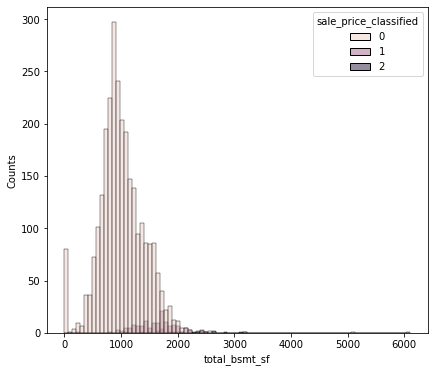

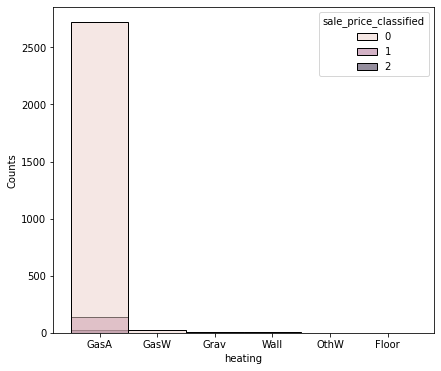

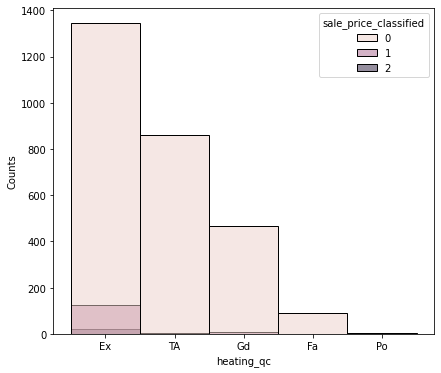

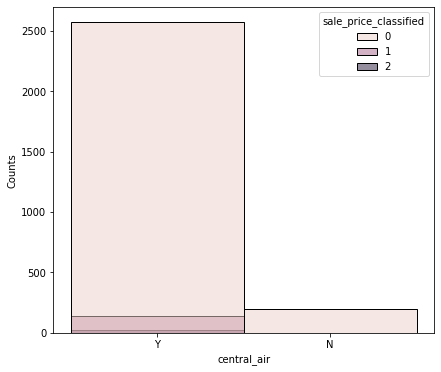

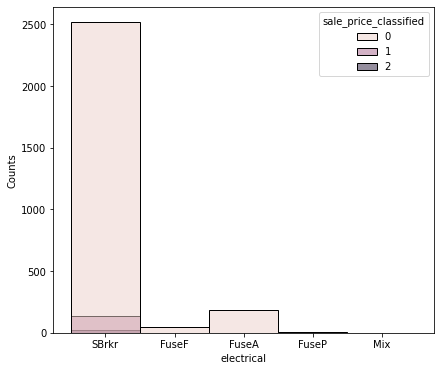

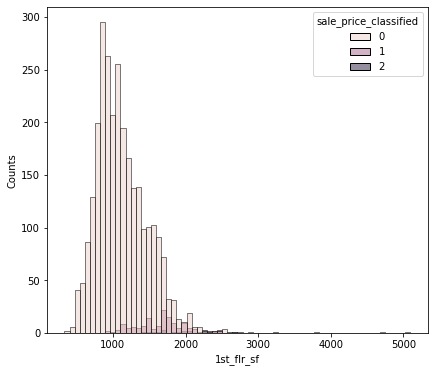

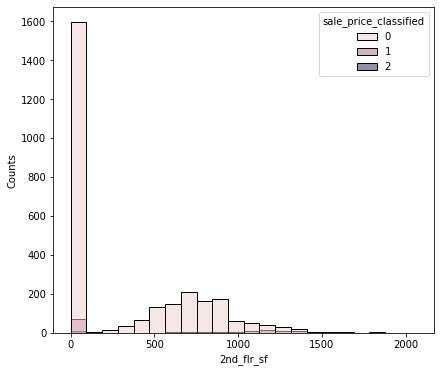

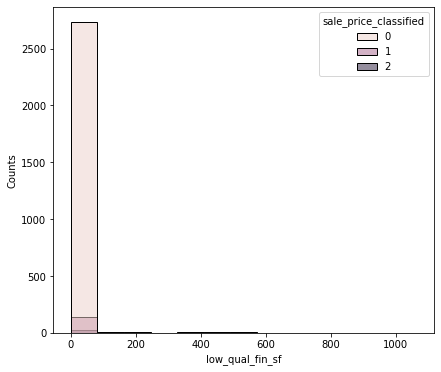

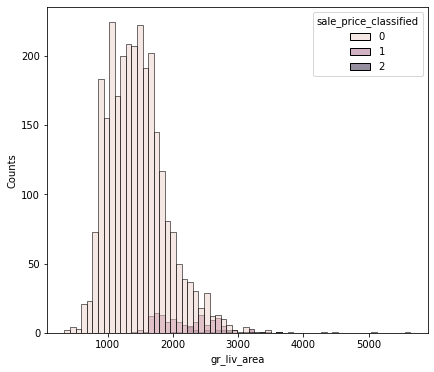

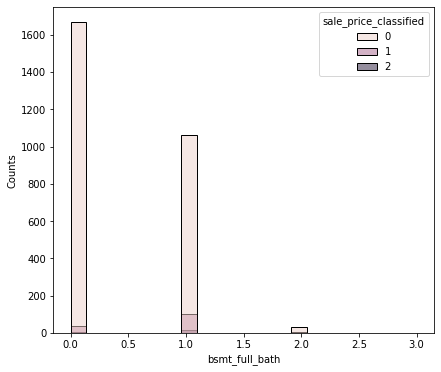

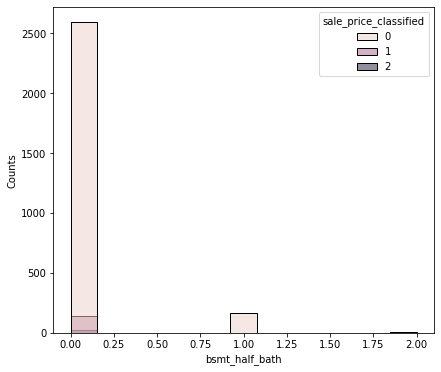

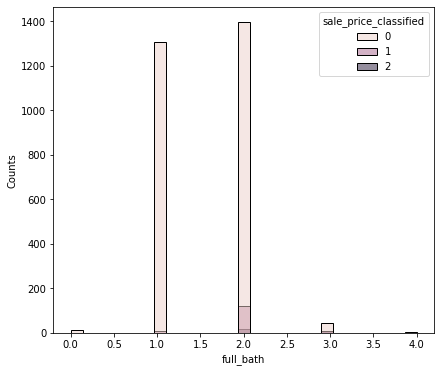

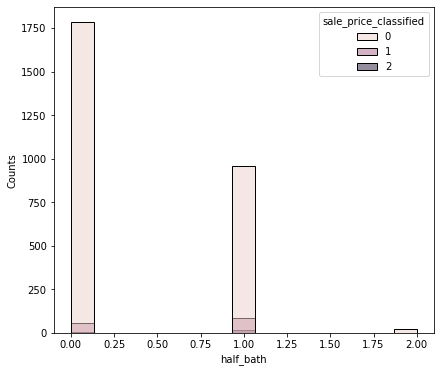

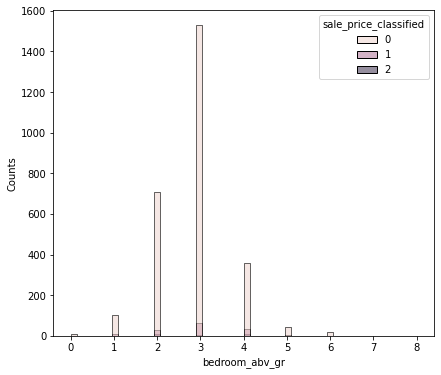

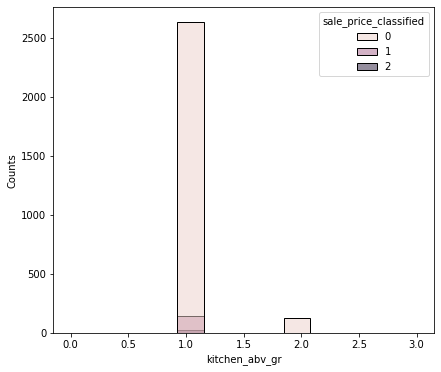

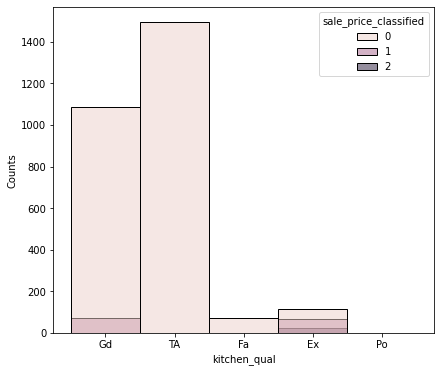

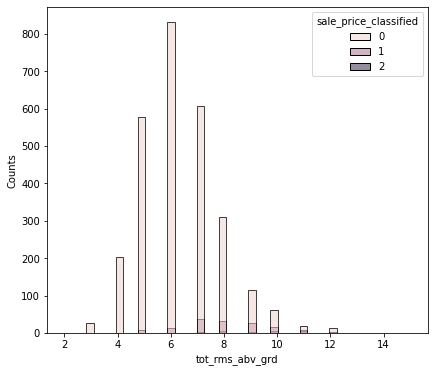

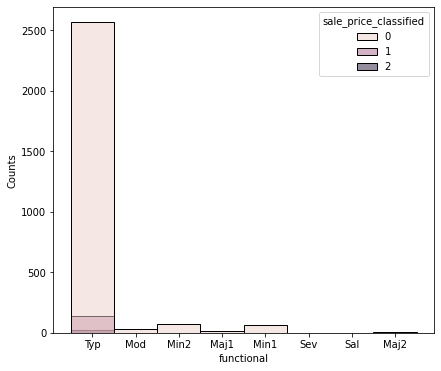

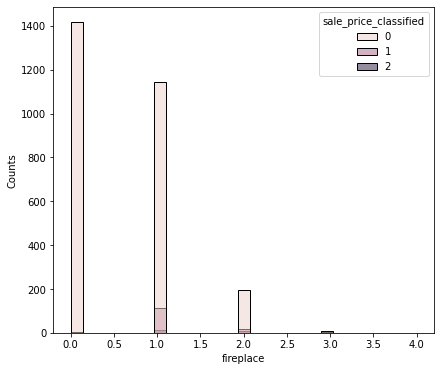

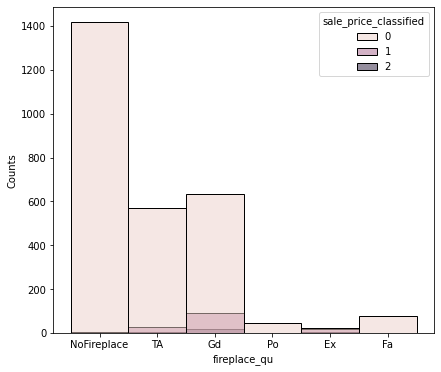

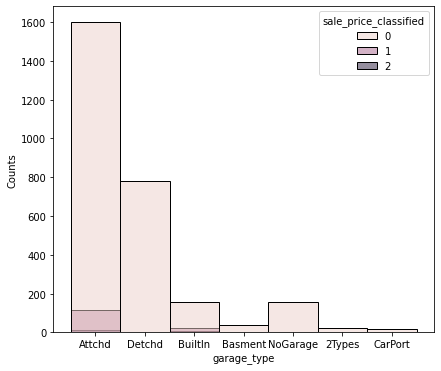

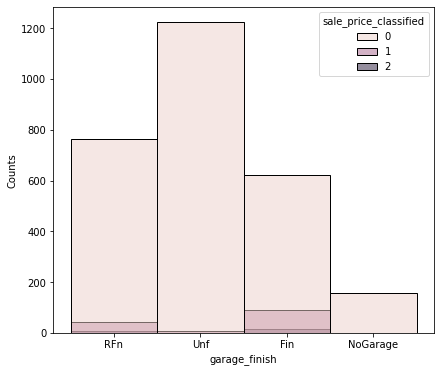

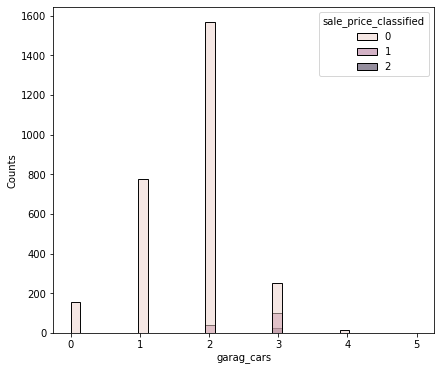

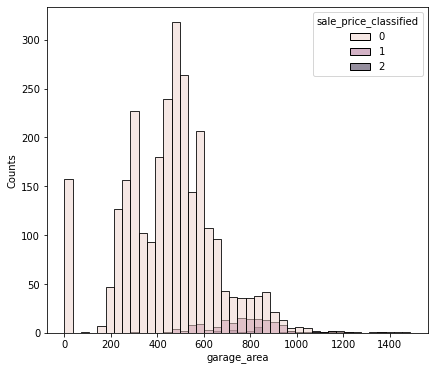

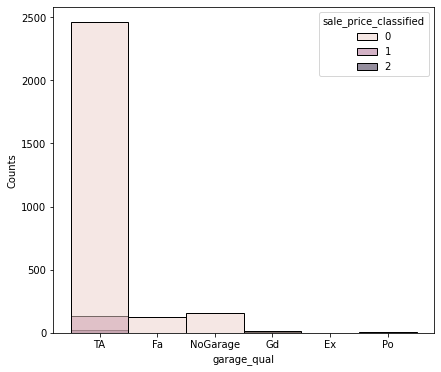

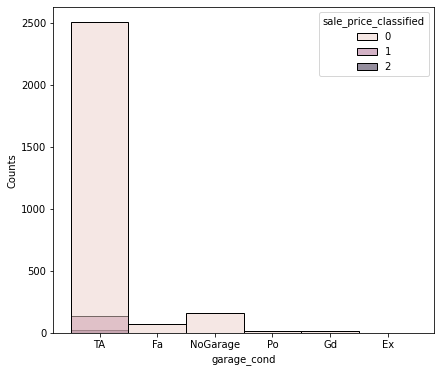

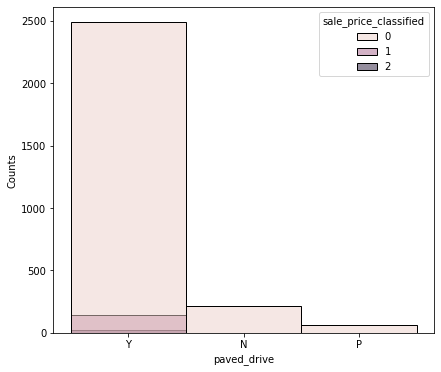

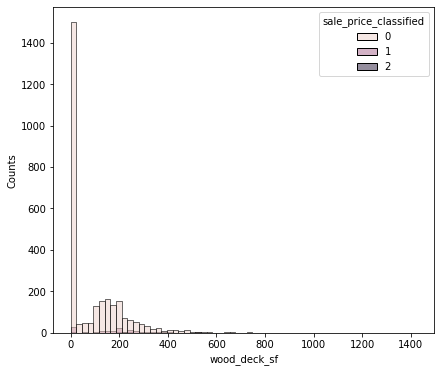

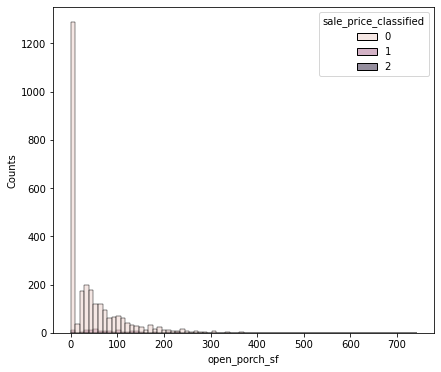

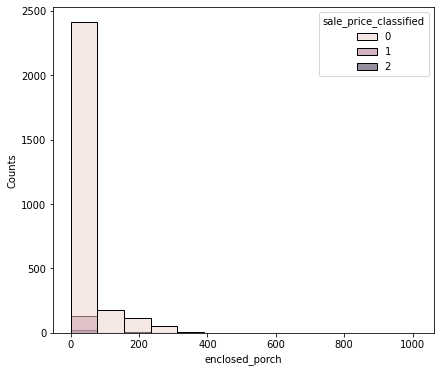

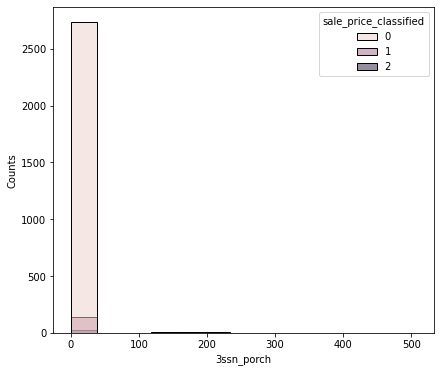

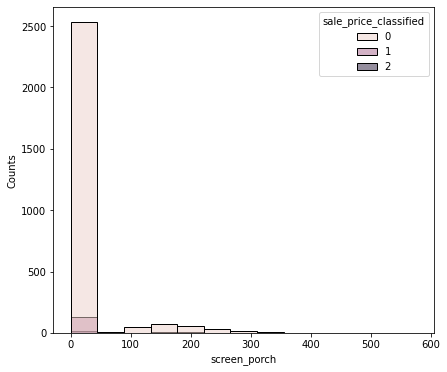

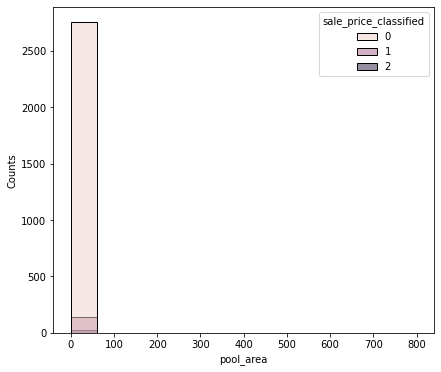

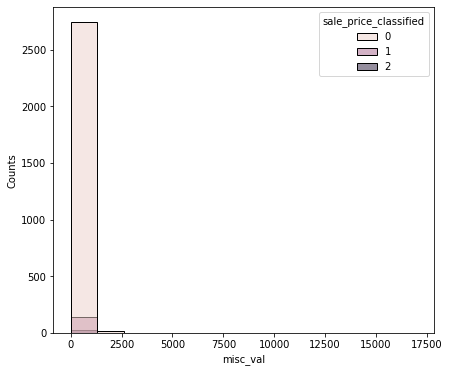

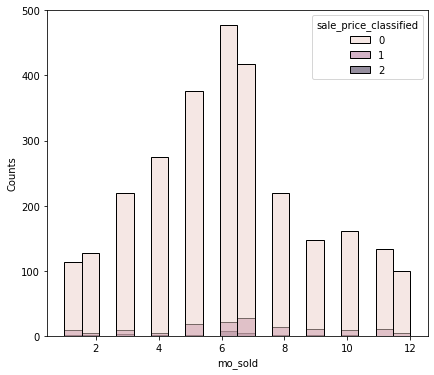

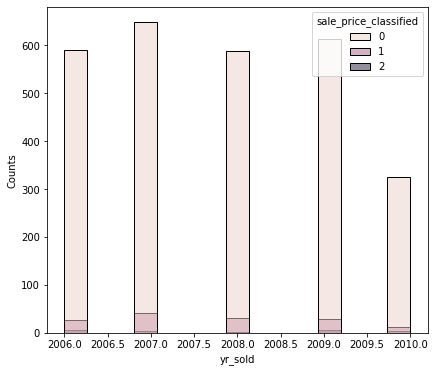

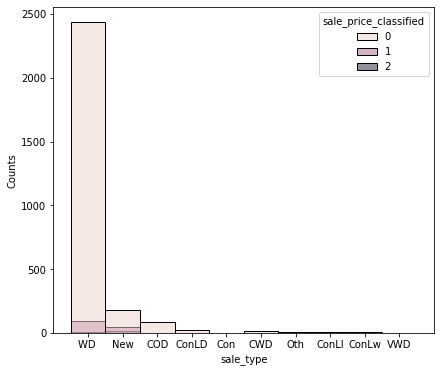

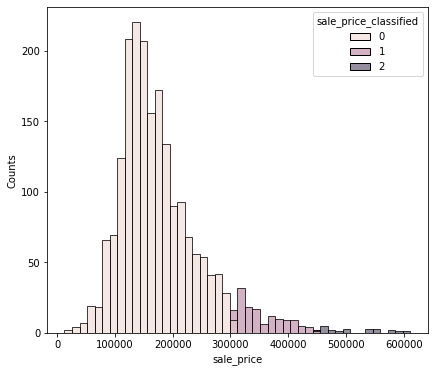

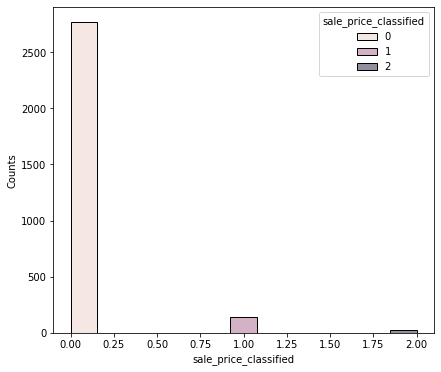

In [53]:
for var in df.columns:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.histplot(x = var, data = df, hue = 'sale_price_classified', color = 'tab10')
    fig.set_title('')
    fig.set_xlabel(var)
    fig.set_ylabel('Counts')

    plt.show()

**Variables not to use/may not use**

id, pid --> no relevance 

ms_subclass, ms_zoning, cond1, cond2, bldg_type,house_style, overall_cond, ext_1st, ext_2nd, mas_vnr_type,mas_vnr_area
bsmt_cond, bsmt_exposure, bsmt_unf_sf, 2nd_Flor_sf, low_qual_fin_sf, bsmt_full_bath,  bsmt_half_bath, full_bath, half_bath, 
bedroom_abv_grd, kitchen_abv_grd , open_porch_sf, wood_deck_sf, 

--> overlaps with higher sale price, nt in order, hence not good 

pave, no alley, lot shape, land_cotour,util, lot_config, land_slope,roof_style, roof_matl,exter_cond,foundation, 
bsmtfin_type1, bsmt_type2, bsmt_sf2, heating, central_air, electrical, paved_drive, 
->> majority classified under low sale price, which may skew predicted price lower 

bsmtfin_sf1 --> good distribution against sale price clsuter, but having cluster even at near zero with high sale price

**Variables to use as main**

1) lot_front -> distribution is clear against sale price

2) lot_area -> distribution is clear against sale price, but need to take care of above 20000

3) Neighbourhood --> can see clusters of higher cost housing in certain areas

4) Overall_qual --> positively correlated to ordinal cat against sale price

5) year_built --> the latest it was built in, the higher the price, need to watch for cluster after year 2000

6) year_removd_add --> the latest it was built in, the higher the price, need to watch for cluster after year 2000

7) exter_qual --> positively correlated to ordinal cat against sale price, cluster in EX

8) bsmt_qual --> positively correlated to ordinal cat against sale price, cluster in EX

9) heating_qc --> most high end sale price are in ex, need watch for cluster at ex with normal sale price. 
              --> can consider interaction terms with other quals to be more accurate for higher selling price
              
              
10) total_bsmt_sf --> distribution is clear against sale price, need to create categorical separate by 3 sale groups for interactions 

11) 1st_flor_sf -->  distribution is clear against sale price, need to create categorical separate by 3 sale groups for interactions 

12) gv_liv_area-->  distribution is clear against sale price, need to create categorical separate by 3 sale groups for interactions 

13) kitchen_qual -->  distribution is clear against sale price, need to create categorical separate by 3 sale groups for interactions 

14) garage_finish --> ordinal cat matches with sales prices. 

15) fireplace_qu -> ordinal cat matches with sales prices.

(1000.0, 3000.0)

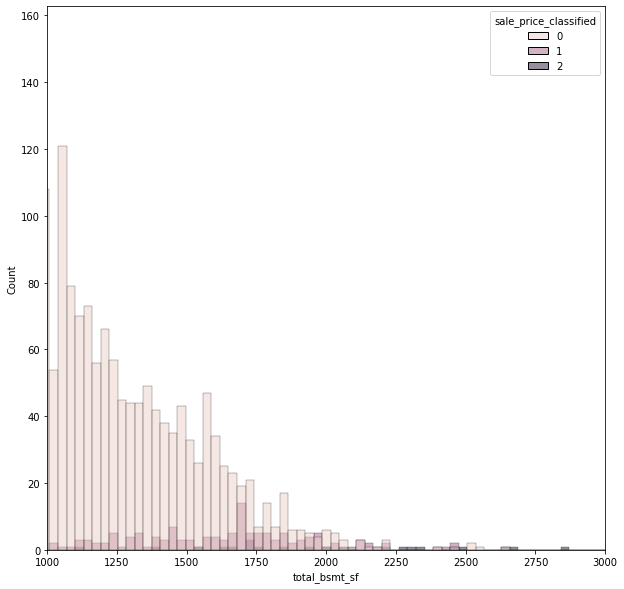

In [54]:
#finding cut off for total_bsmt_sf_class
plt.figure(figsize=(10,10))
sns.histplot(x = 'total_bsmt_sf', data = df, hue = 'sale_price_classified', bins =200)

plt.xlim(1000,3000)

In [55]:
df.groupby('sale_price_classified')['total_bsmt_sf'].mean()

sale_price_classified
0    1013.212220
1    1622.128571
2    2060.782609
Name: total_bsmt_sf, dtype: float64

In [56]:
df['total_bsmt_sf_class'] = df['total_bsmt_sf'].map(lambda x: 1 if x > 1700 else 0)

<AxesSubplot:xlabel='neighborhood', ylabel='Count'>

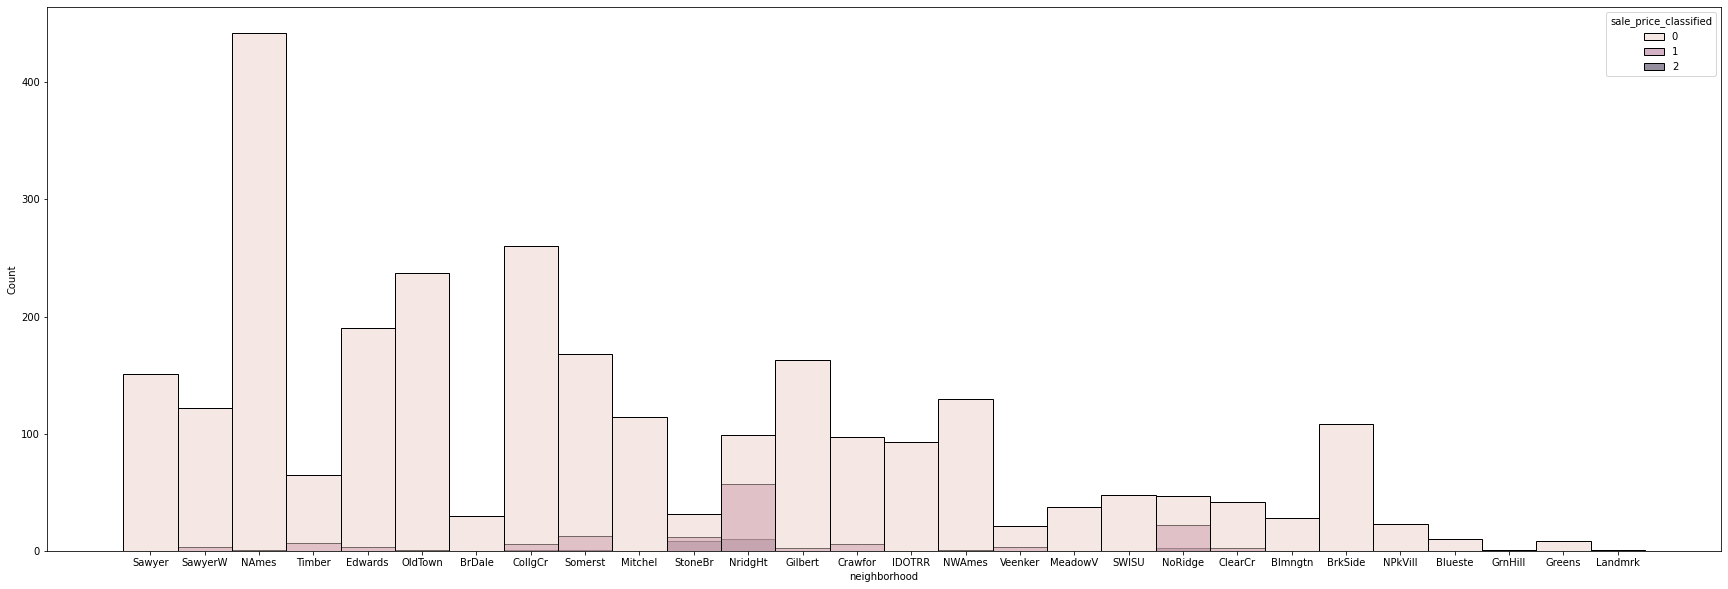

In [57]:
plt.figure(figsize=(30,10))
sns.histplot(x = 'neighborhood', data = df, hue = 'sale_price_classified')

# plt.xlim(1000,3000)

In [58]:
test = df.loc[:,['sale_price_classified', 'neighborhood']]

pd.pivot_table(test, values = 'sale_price_classified', index = ['neighborhood']).sort_values(by = 'sale_price_classified', ascending = False).head(5)

,sale_price_classified
neighborhood,
StoneBr,0.549020
GrnHill,0.500000
NridgHt,0.463855
NoRidge,0.366197
Veenker,0.125000


In [59]:
# make new column to exclude the rest of neighbourhood as 0 and Northridge Heights, Stone Brook and Northridge having 1 

df['neighborhood_class'] = df['neighborhood'].map(lambda x: 1 if x in ['StoneBr', 'NridgHt', 'NoRidge', 'GrnHill'] else 0)

**comments**
1) Northridge Heights, Stone Brook and Northridge has majority high sale price housing


(1000.0, 3000.0)

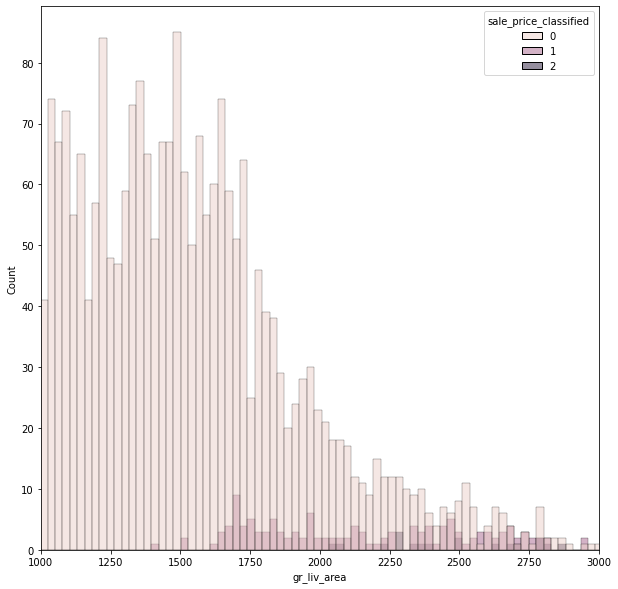

In [60]:
plt.figure(figsize=(10,10))
sns.histplot(x = 'gr_liv_area', data = df, hue = 'sale_price_classified', bins =200)

plt.xlim(1000,3000)

In [61]:
df['gr_liv_area_class'] = df['gr_liv_area'].map(lambda x: 1 if x > 2600 else 0)

In [62]:
# assign 0 to bsmt_full_bath since no basement 
df.loc[df['bsmt_full_bath'].isnull(), 'bsmt_full_bath'] = 0
# assign 0 to bsmt_half_bath since no basement 
df.loc[df['bsmt_half_bath'].isnull(), 'bsmt_half_bath'] = 0

In [63]:
# assign to the most common types for electrical
df.loc[df['electrical'].isnull(), 'electrical'] = df['electrical'].mode()[0]

In [64]:
df.isnull().sum().values

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 878,
         0,   0,   0,   0], dtype=int64)

*choosing relevant variables for main set of data*

### Add weight on ordinal categories 

In [65]:
ordinal_cat = ['lot_shape','util','land_slope','exter_qual','exter_cond','bsmt_qual','bsmt_cond','bsmt_exposure',
               'bsmtfin_type1','bsmt_type2','electrical','kitchen_qual','functional','fireplace_qu','garage_finish',
               'garage_qual','garage_cond','paved_drive','overall_cond','heating_qc'
]

In [66]:
for cat in ordinal_cat:
    print(cat,df[cat].unique())

lot_shape ['IR1' 'Reg' 'IR2' 'IR3']
util ['AllPub' 'NoSeWa' 'NoSewr']
land_slope ['Gtl' 'Sev' 'Mod']
exter_qual ['Gd' 'TA' 'Ex' 'Fa']
exter_cond ['TA' 'Gd' 'Fa' 'Ex' 'Po']
bsmt_qual ['TA' 'Gd' 'Fa' 'NoBsmt' 'Ex' 'Po']
bsmt_cond ['TA' 'Gd' 'NoBsmt' 'Fa' 'Po' 'Ex']
bsmt_exposure ['No' 'Gd' 'Av' 'NoBsmt' 'Mn']
bsmtfin_type1 ['GLQ' 'Unf' 'ALQ' 'Rec' 'NoBsmt' 'BLQ' 'LwQ']
bsmt_type2 ['Unf' 'Rec' 'NoBsmt' 'BLQ' 'GLQ' 'LwQ' 'ALQ']
electrical ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix']
kitchen_qual ['Gd' 'TA' 'Fa' 'Ex' 'Po']
functional ['Typ' 'Mod' 'Min2' 'Maj1' 'Min1' 'Sev' 'Sal' 'Maj2']
fireplace_qu ['NoFireplace' 'TA' 'Gd' 'Po' 'Ex' 'Fa']
garage_finish ['RFn' 'Unf' 'Fin' 'NoGarage']
garage_qual ['TA' 'Fa' 'NoGarage' 'Gd' 'Ex' 'Po']
garage_cond ['TA' 'Fa' 'NoGarage' 'Po' 'Gd' 'Ex']
paved_drive ['Y' 'N' 'P']
overall_cond [8 5 7 6 3 9 2 4 1]
heating_qc ['Ex' 'TA' 'Gd' 'Fa' 'Po']


In [67]:
# defining a function to return rate
def rate_Po_Excellent(col): 
    rate_dict = {'NoBsmt': 0,'NoFireplace': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5,
                 'Gtl':3, 'Sev':1, 'Mod':2,
                'IR1':3, 'Reg':4, 'IR2':2, 'IR3':1,
                'AllPub':3, 'NoSeWa':1, 'NoSewr':2,
                'No':1, 'Gd':4, 'Av':3, 'Mn':2,
                'NoGarage':0, 'Unf': 1, 'RFn': 2, 'Fin': 3,
                'SBrkr':5, 'FuseF':3,'FuseA':4, 'FuseP':2, 'Mix':1,
                'Typ':8, 'Mod':5, 'Min2':6, 'Maj1':4, 'Min1':7, 'Sev':2, 'Sal':1, 'Maj2':3,
                'Y':3, 'N':1, 'P':2,
                 'Unf':1 , 'Rec':3 , 'NoBsmt':0 , 'BLQ':4 , 'GLQ':6 , 'LwQ':2 , 'ALQ':5 ,
                }

    return rate_dict[col]

In [68]:
for cat in ordinal_cat:
    if cat != 'overall_cond':
        df[cat] = df[cat].map(rate_Po_Excellent)
        print(cat,df[cat].unique())
    else:
        print(cat,df[cat].unique())

lot_shape [3 4 2 1]
util [3 1 2]
land_slope [3 2 5]
exter_qual [4 3 5 2]
exter_cond [3 4 2 5 1]
bsmt_qual [3 4 2 0 5 1]
bsmt_cond [3 4 0 2 1 5]
bsmt_exposure [1 4 3 0 2]
bsmtfin_type1 [6 1 5 3 0 4 2]
bsmt_type2 [1 3 0 4 6 2 5]
electrical [5 3 4 2 1]
kitchen_qual [4 3 2 5 1]
functional [8 5 6 4 7 2 1 3]
fireplace_qu [0 3 4 1 5 2]
garage_finish [2 1 3 0]
garage_qual [3 2 0 4 5 1]
garage_cond [3 2 0 1 4 5]
paved_drive [3 1 2]
overall_cond [8 5 7 6 3 9 2 4 1]
heating_qc [5 3 4 2 1]


In [69]:
area_only = ['lot_front', 'lot_area','total_bsmt_sf', '1st_flr_sf', 'gr_liv_area', 'sale_price']

main_variables = ['lot_front', 'lot_area', 'overall_qual', 'year_built', 'year_remod_add',
 'exter_qual', 'bsmt_qual', 'heating_qc', 'total_bsmt_sf', '1st_flr_sf', 'gr_liv_area',
 'kitchen_qual', 'garage_finish', 'fireplace_qu', 'total_bsmt_sf_class', 'neighborhood_class', 'gr_liv_area_class', 'sale_price']

other_columns = [col for col in df.columns if (col not in main_variables) & (col not in ['index','id','pid']) & (col not in ordinal_cat)]


In [70]:
# Change other columns to get dummies for cat features

other_df = df.copy()[other_columns]

other_cat_features = [col for col in other_df.columns if df[col].dtype == 'O']
other_numerical_features = [col for col in other_df.columns if df[col].dtype != 'O']


other_cat = pd.get_dummies(data = other_df[other_cat_features])
other_num = other_df[other_numerical_features]

other_df = pd.concat([other_num,other_cat], axis = 1)
other_df

,ms_subclass,mas_vnr_area,bsmtfin_sf1,bsmt_sf2,bsmt_unf_sf,2nd_flr_sf,low_qual_fin_sf,bsmt_full_bath,bsmt_half_bath,full_bath,...,sale_type_COD,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_VWD,sale_type_WD
0,60,289.0,533.0,0.0,192.0,754,0,0.0,0.0,2,...,0,0,0,0,0,0,0,0,0,1
1,60,132.0,637.0,0.0,276.0,1209,0,1.0,0.0,2,...,0,0,0,0,0,0,0,0,0,1
2,20,0.0,731.0,0.0,326.0,0,0,1.0,0.0,1,...,0,0,0,0,0,0,0,0,0,1
3,60,0.0,0.0,0.0,384.0,700,0,0.0,0.0,2,...,0,0,0,0,0,0,0,0,0,1
4,50,0.0,0.0,0.0,676.0,614,0,0.0,0.0,2,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2924,60,0.0,931.0,153.0,0.0,793,0,1.0,0.0,2,...,0,0,0,0,0,0,0,0,0,1
2925,60,410.0,575.0,0.0,529.0,884,0,0.0,0.0,2,...,0,0,0,0,0,0,0,0,0,1
2926,20,0.0,250.0,492.0,210.0,0,0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,1
2927,20,0.0,616.0,0.0,248.0,0,0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,1


In [71]:
# writing other df
other_df.to_csv('other_df.csv')

In [72]:
# main data to do faeture engineering 
main_data = df.copy()
main_data = main_data[main_variables]

In [73]:
# writing main_data and combi with other_df

id_adder = df['id']
main_data = pd.concat([id_adder,main_data], axis = 1)
main_data.to_csv('Main_data.csv')
main_data_1 = pd.concat([main_data, other_df], axis = 1)
main_data_1.to_csv('Main_with_other_df.csv')

sale_price             1.000000
overall_qual           0.800207
exter_qual             0.712146
gr_liv_area            0.697038
kitchen_qual           0.692336
total_bsmt_sf          0.629303
1st_flr_sf             0.618486
bsmt_qual              0.612188
neighborhood_class     0.599694
year_built             0.571849
garage_finish          0.557839
year_remod_add         0.550370
fireplace_qu           0.538925
total_bsmt_sf_class    0.501318
heating_qc             0.458354
gr_liv_area_class      0.372024
lot_front              0.325940
lot_area               0.296566
Name: sale_price, dtype: float64

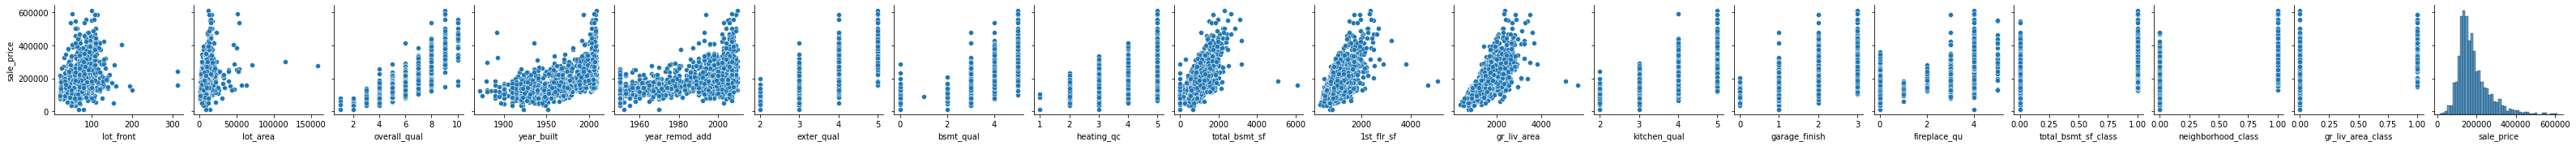

In [74]:
# generally can see same two outlier for continuous categories 

sns.pairplot(
    x_vars = main_variables,
    y_vars = 'sale_price',
    data = main_data

)
main_data[main_variables].corr()['sale_price'].sort_values(ascending = False)

,id,lot_front,lot_area,overall_qual,year_built,year_remod_add,exter_qual,bsmt_qual,heating_qc,total_bsmt_sf,1st_flr_sf,gr_liv_area,kitchen_qual,garage_finish,fireplace_qu,total_bsmt_sf_class,neighborhood_class,gr_liv_area_class,sale_price
960,1499,313.0,63887,10,2008,2008,5,5,5,6110.0,4692,5642,5,3,4,1,0,1,160000.0
1885,2181,128.0,39290,10,2008,2009,5,5,5,5095.0,5095,5095,5,3,4,1,0,1,183850.0


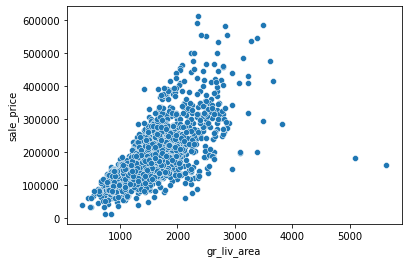

In [75]:
# check outlier --> remove after concat with other variables 

sns.scatterplot(
    x = 'gr_liv_area',
    y = 'sale_price',
    data = main_data
)

# observed two outliers --> will check if outlier affects linear regression later

main_data[main_data['gr_liv_area'] > 5000]

In [76]:
# orginal test format
kaggle_test

,id,pid,ms_subclass,ms_zoning,lot_front,lot_area,street,alley,lot_shape,land_contour,...,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,1662,527377110,60,RL,80.0,8000,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,11,2007,WD
874,1234,535126140,60,RL,90.0,14670,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,MnPrv,NaN,0,8,2008,WD
875,1373,904100040,20,RL,55.0,8250,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2008,WD
876,1672,527425140,20,RL,60.0,9000,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,GdWo,NaN,0,5,2007,WD


In [77]:
# split test data (Kaggle)
# cross check -->> OK

kaggle_test_final = main_data[2051:]
kaggle_test_final = kaggle_test_final.reset_index(drop = 'index')
kaggle_test_final['sale_price']

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
873   NaN
874   NaN
875   NaN
876   NaN
877   NaN
Name: sale_price, Length: 878, dtype: float64

In [101]:
# checked all rows are in line with original test data after split 
len(((kaggle_test_final['id']+kaggle_test['id'])/2) == kaggle_test['id'])

878

In [78]:
# split train data (Kaggle)

kaggle_train_final = main_data[:2051]
kaggle_train_final['sale_price'].tail(10)

2041    412500.0
2042     83000.0
2043    128000.0
2044    182000.0
2045    394617.0
2046    298751.0
2047     82500.0
2048    177000.0
2049    144000.0
2050    189000.0
Name: sale_price, dtype: float64

## Pre - processing

**Apply Standard Scaler**

In [79]:
# assign X and y

X = kaggle_train_final.drop(columns = ['sale_price','id'])
y = kaggle_train_final['sale_price']
indices = X.index.values

# Create train/test splits.
X_train, X_test, y_train, y_test,indices_train, indices_test = train_test_split(
    X,
    y,
    indices,
    test_size=0.4,
    random_state = 123
)

# Scale our data.
# Relabeling scaled data as "Z" is common.
sc = StandardScaler()
# Z_train = sc.fit_transform(X_train)
sc.fit(X_train) # fit should only see train data, 
                #else if put in test, will have leak from the train data 
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

## Modelling

**Linear Regression - First pass**

In [80]:
lr = LinearRegression()

lr.fit(X_train,y_train)

# cross val mse
cross_score = - cross_val_score(
    lr,
    X_train,
    y_train,
    cv = 3,
    scoring = 'neg_mean_squared_error'
).mean()

# test mse
mse_test = mean_squared_error(
    y_test,
    lr.predict(X_test)
)
# cross - test 
mse_train_minus_test = cross_score - mse_test

if mse_train_minus_test > 0:
    print(f'MSE for train: {cross_score}')
    print(f'MSE for test: {mse_test}')
    print(f'Underfited by: {mse_train_minus_test}')
else:
    print(f'MSE for train: {cross_score}')
    print(f'MSE for test: {mse_test}')
    print(f'Overfitted by: {mse_train_minus_test}')
print(f'RMSE: {mse_test**0.5}')

MSE for train: 1032287570.1877865
MSE for test: 1031044786.6215752
Underfited by: 1242783.5662112236
RMSE: 32109.88611972293


MSE for train: 713361442.8092579
MSE for test: 595526994.3202205
Underfited by: 117834448.4890374
RMSE: 24403.421774829458

Text(27.125, 0.5, 'Actual Sale Price')

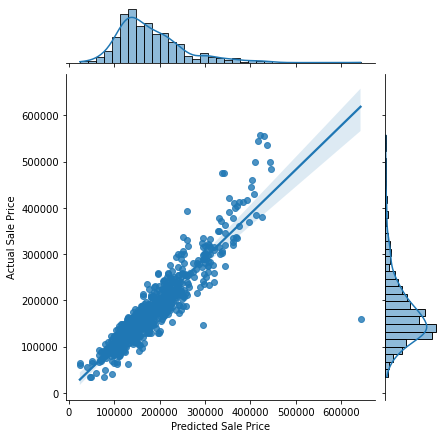

In [81]:
# noticed at higher ends of the sale_price,
# model is calculating below real sales_price

ax = sns.jointplot(
    x = lr.predict(X_test),
    y = y_test,
    kind = 'reg'
)
ax.ax_joint.set_xlabel('Predicted Sale Price')
ax.ax_joint.set_ylabel('Actual Sale Price')

In [82]:
# find out index 339 having anomaly 
anomaly = {num: val for num,val in enumerate (lr.predict(X_test)>600000) if val == True}
anomaly

{339: True}

In [83]:
indices_test[339]

960

In [84]:
# copy to filter off outlier in scatterplot

filter_outlier = main_data.copy()

#assign zero 
filter_outlier.iloc[960:961,-1] = 0 

filter_outlier['outlier'] = filter_outlier['sale_price'].map(lambda x: 'outlier' if x == 0 else 'normal')

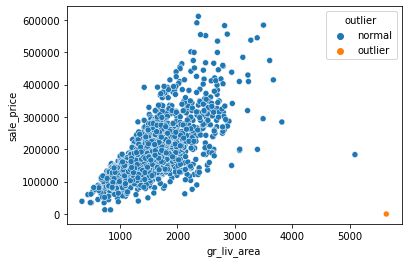

In [85]:
# found two outliers with one already found 

sns.scatterplot(
    x = 'gr_liv_area',
    y = 'sale_price',
    data = filter_outlier,
    hue = 'outlier'
);

In [87]:
main_data[filter_outlier['gr_liv_area'] > 5000]

,id,lot_front,lot_area,overall_qual,year_built,year_remod_add,exter_qual,bsmt_qual,heating_qc,total_bsmt_sf,1st_flr_sf,gr_liv_area,kitchen_qual,garage_finish,fireplace_qu,total_bsmt_sf_class,neighborhood_class,gr_liv_area_class,sale_price
960,1499,313.0,63887,10,2008,2008,5,5,5,6110.0,4692,5642,5,3,4,1,0,1,160000.0
1885,2181,128.0,39290,10,2008,2009,5,5,5,5095.0,5095,5095,5,3,4,1,0,1,183850.0


In [88]:
# drop two outliers from train data set 
main_data.drop(index = [960,1885], inplace = True)

**Redo pre-processing**

In [89]:
# reassign test_train data  

kaggle_test_final = main_data[2049:]
kaggle_test_final = kaggle_test_final.reset_index(drop = 'index')

kaggle_train_final = main_data[:2049]


In [90]:
# assign X and y

X = kaggle_train_final.drop(columns = ['sale_price','id'])
y = kaggle_train_final['sale_price']
indices = X.index.values

# Create train/test splits.
X_train, X_test, y_train, y_test,indices_train, indices_test = train_test_split(
    X,
    y,
    indices,
    test_size=0.4,
    random_state = 123
)

# Scale our data.
# Relabeling scaled data as "Z" is common.
sc = StandardScaler()
# Z_train = sc.fit_transform(X_train)
sc.fit(X_train) # fit should only see train data, 
                #else if put in test, will have leak from the train data 
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

**Redo Linear regression - Filtered off outlier**

In [91]:
lr = LinearRegression()

lr.fit(X_train,y_train)

# cross val mse
cross_score = - cross_val_score(
    lr,
    X_train,
    y_train,
    cv = 3,
    scoring = 'neg_mean_squared_error'
).mean()

# test mse
mse_test_2 = mean_squared_error(
    y_test,
    lr.predict(X_test)
)
# cross - test 
mse_train_minus_test = cross_score - mse_test_2

if mse_train_minus_test > 0:
    print(f'MSE for train: {cross_score}')
    print(f'MSE for test: {mse_test_2}')
    print(f'Underfited by: {mse_train_minus_test}')
else:
    print(f'MSE for train: {cross_score}')
    print(f'MSE for test: {mse_test_2}')
    print(f'Overfitted by: {mse_train_minus_test}')
print(f'RMSE: {mse_test_2**0.5}')

MSE for train: 806449037.4263712
MSE for test: 800543517.3593601
Underfited by: 5905520.067011118
RMSE: 28293.877736347134


Text(27.125, 0.5, 'Actual Sale Price')

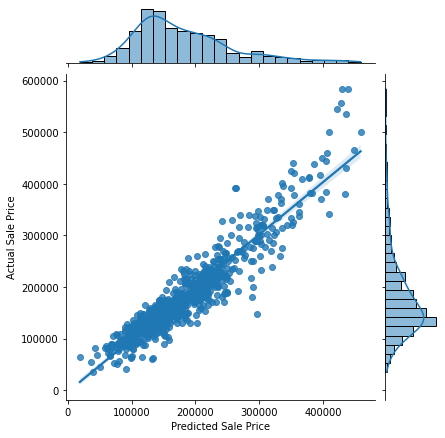

In [92]:
# noticed at higher ends of the sale_price,
# model is calculating below real sales_price

ax = sns.jointplot(
    x = lr.predict(X_test),
    y = y_test,
    kind = 'reg'
)
ax.ax_joint.set_xlabel('Predicted Sale Price')
ax.ax_joint.set_ylabel('Actual Sale Price')

In [93]:
# **MSE improvement**
print(f'Current rmse = {mse_test_2**0.5}')
print(f'mse difference = {mse_test - mse_test_2}')
print(f'% diff = {round((((mse_test_2- mse_test)/mse_test))*100,2)}%')

Current rmse = 28293.877736347134
mse difference = 230501269.26221514
% diff = -22.36%


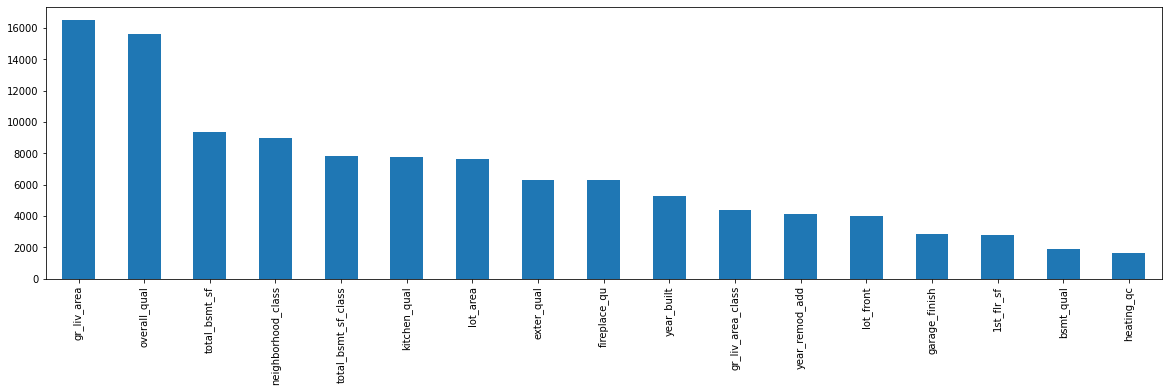

In [95]:
# to plot the series to rank variables 
plt.figure(figsize=(20,5))

col = kaggle_train_final.columns.drop(['sale_price','id'])
pd.Series(lr.coef_, index = col).sort_values(ascending = False).plot.bar();